In [111]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import lightkurve as lk
import astropy.units as u
import pandas as pd
import sys
from astropy.coordinates import SkyCoord

# TESS-HERMES exploration

In [2]:
#data2 was originally same as data but now fixed to add _tic at end


data = fits.open('background-readings/TESS-HERMES-cvzTICS/tess_hermes_dr1.0.fits') #tess-hermes catalog
data2 = fits.open('background-readings/TESS-HERMES-cvzTICS/tess_hermes_dr1.0_tic.fits') #tic catalog of tess-hermes targets
#wait dont think thats what data2 is...

data2.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1c1c4b7ac8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1c1c4d4a20>]>

In [9]:
data[1].data.shape #Hermes

(24968,)

In [107]:
hdr = data2[1].header #Hermes subset of tic catalog
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  730 / length of dimension 1                          
NAXIS2  =                24968 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   91 / number of table fields                         
TTYPE1  = 'apass   '                                                            
TFORM1  = '8A      '                                                            
TTYPE2  = 'e_umag  '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'ucac    '        

In [106]:
#data2.info()
#data2[1].data

In [369]:

#plotting decs from hermes tic cat subset


# dec=[]
# for i in data2[1].data['dec']: #Hermes tic cat subset
#     dec.append(i)
# dec=np.array(dec)
# dec.shape
# print('max:',np.max(dec),'min:',np.min(dec))


# plt.figure(figsize=(10,10))
# y = np.arange(0,len(dec),1)
# plt.scatter(dec,y,s=0.2)
# plt.title('Declinations from TIC (for tess-hermes targets)',size=35) #matches DR1 from tesshermes like expected

Text(0.5, 1.0, 'Temp ranges in Hermes')

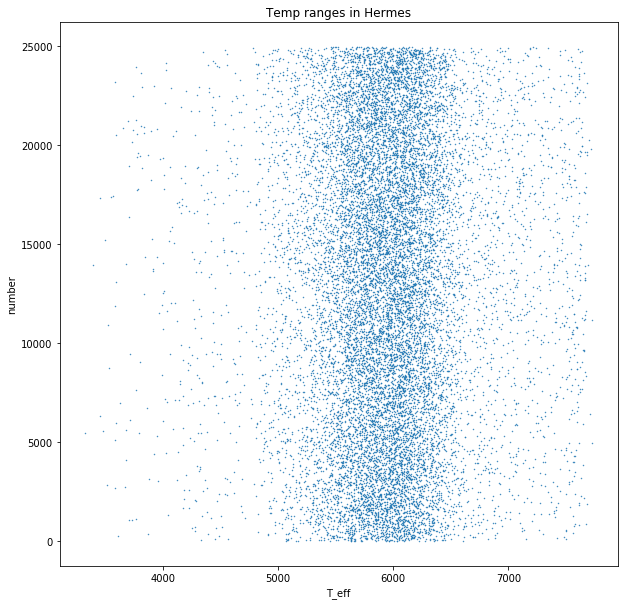

In [371]:
#temps in Hermes


#hdr.keys
temps=[]
for i in data[1].data['teff']:
    temps.append(i)
temps=np.array(temps)
temps.shape


plt.figure(figsize=(10,10))
y = np.arange(0,len(temps),1)
plt.scatter(temps,y,s=0.2)
plt.xlabel('T_eff')
plt.ylabel('number')
plt.title('Temp ranges in Hermes')

In [12]:
#hermes data

cool = temps[np.where(temps<4500)] #stars need to be cooler than this to see the period gap
cool.shape

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(247,)

max: -54.4430277778 min: -77.3916944444


Text(0.5, 1.0, 'Declinations in TESS-HERMES')

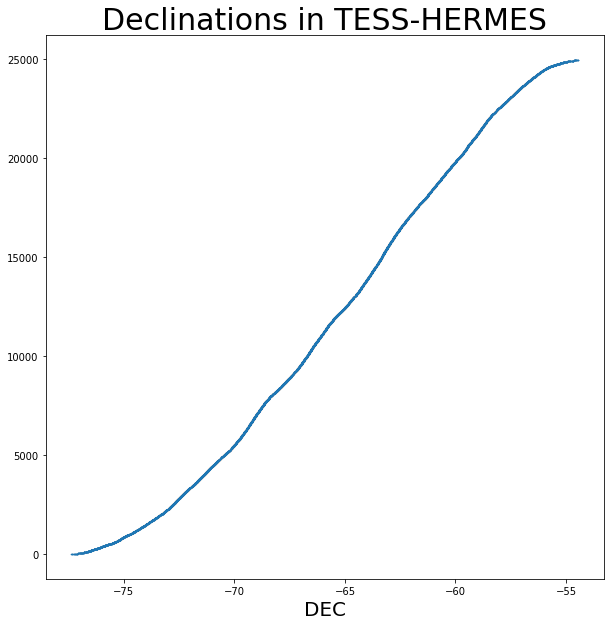

In [108]:
#hermes

decs=[]
for i in data[1].data['dec']:
    decs.append(i)
decs=np.array(decs)
decs.shape

print('max:',np.max(decs),'min:',np.min(decs))
plt.figure(figsize=(10,10))
y = np.arange(0,len(decs),1)
plt.scatter(decs,y,s=0.2)
plt.xlabel('DEC',size=20)
plt.title('Declinations in TESS-HERMES',size =30)

max: 122.613791667 min: 59.7241666667


Text(0.5, 1.0, 'Right Ascensions in TESS-HERMES')

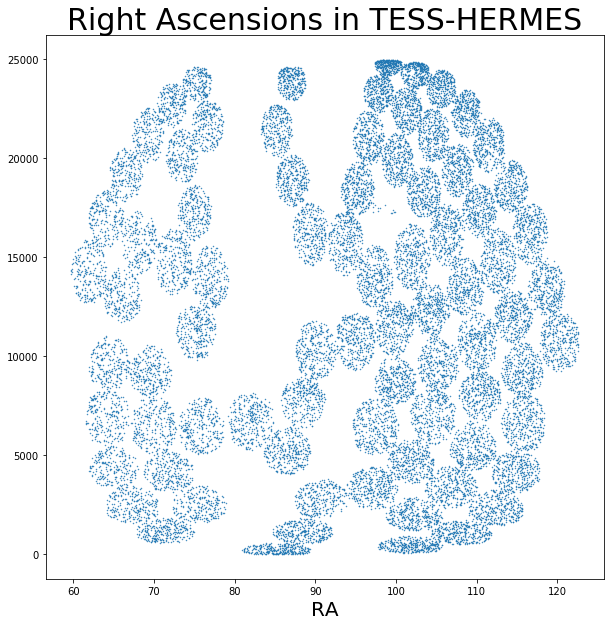

In [118]:
#hermes

ras=[]
for i in data[1].data['ra']:
    ras.append(i)
ras=np.array(ras)
ras.shape

print('max:',np.max(ras),'min:',np.min(ras))
plt.figure(figsize=(10,10))
y = np.arange(0,len(ras),1)
plt.scatter(ras,y,s=0.2)
plt.xlabel('RA',size=20)
plt.title('Right Ascensions in full TESS-HERMES',size =30)

Text(0.5, 1.0, 'Positions in full TESS-HERMES')

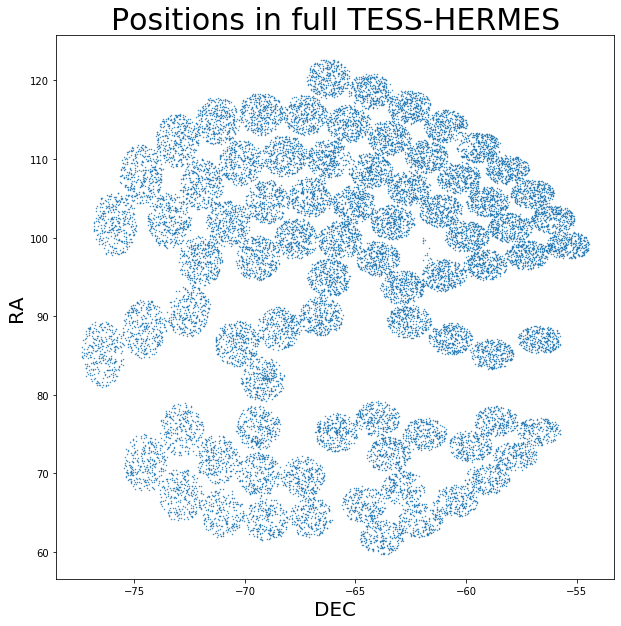

In [122]:
#hermes

plt.figure(figsize=(10,10))
plt.scatter(decs, ras,s=0.2)
plt.xlabel('DEC',size=20)
plt.ylabel('RA',size=20)
plt.title('Positions in full TESS-HERMES',size =30)
#try to add a colorbar for temps

In [35]:
hermes_tics = data[1].data['tic_id']
hermes_tics.shape

(24968,)

In [117]:
#testing some unit conversion

testdec = decs[0] #-77.3916944444
testdec
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=testdec*u.degree, frame='icrs')
c_icrs.galactic #303.5490584, -39.72613177
# c_galactic = SkyCoord(l=10.68458*u.degree, b=testdec*u.degree, frame='galactic')
# c_galactic.icrs #359.19217522, -31.2343588

<SkyCoord (Galactic): (l, b) in deg
    (303.5490584, -39.72613177)>

# cutting hermes tics based on temp

In [378]:
hermes_tempcut = data[1].data[data[1].data['teff']<4500]
hermes_tempcut

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


FITS_rec([( 84.804875  , -76.96847222, 141436075, '05391315-7658065', '066-004183', 170107002601123, 19.21441245,  39.19305172,  53.13994461,  67.11587501, 10.893, 10.326, 10.168, 4333.  , 4.6069945 , nan, 1.01945939,  5.5958439 , nan, 0.68115   , 0.6572433 , nan, nan, nan, 0.        , 'cooldwarf', 1, 0.025, 0.019, 0.021, 167., 0.2, nan, 0.15012159, 2.        , nan, 0.05673889, 0.04670936, nan, nan, nan),
          (102.17420833, -76.63875   , 177256886, '06484181-7638194', '067-005402', 170109001801091, 26.39812365,  42.93809498,  59.77768355,  84.2136172 , 10.554,  9.969,  9.78 , 4455.  , 4.59410913, nan, 1.00516822,  5.93719471, nan, 0.66428571, 0.64569771, nan, nan, nan, 0.18032603, 'cooldwarf', 1, 0.024, 0.026, 0.023, 174., 0.2, nan, 0.10838043, 1.91957552, nan, 0.05868889, 0.04792134, nan, nan, nan),
          ( 86.116375  , -76.29511111, 364589763, '05442793-7617422', '069-004375', 170107002601373, 37.65531563,  33.90786315,  42.82394675,  68.76686054, 10.76 , 10.254, 10.087, 44

In [381]:
type(hermes_tempcut)

astropy.io.fits.fitsrec.FITS_rec

In [385]:
#making temp cut hermes data a separate fits file


with fits.open('background-readings/TESS-HERMES-cvzTICS/tess_hermes_dr1.0.fits') as hdul:
    data = hdul[1].data
    mask = data['teff'] < 4500
    newdata = data[mask]
    hdu = fits.BinTableHDU(data=newdata)
    hdu.writeto('Hermes_tempcut.fits',overwrite=True)

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


### rerun starting from here for pulling tempcut hermes lcs

In [5]:
#converted temp cut hermes fits table into pandas dataframe

hcut_table = Table.read('Hermes_tempcut.fits')
hcut = hcut_table.to_pandas()
df_tcut_hermes = pd.DataFrame(hcut)
df_tcut_hermes

ra        dec     tic_id             tmass_id           ucac  \
0     84.804875 -76.968472  141436075  b'05391315-7658065'  b'066-004183'   
1    102.174208 -76.638750  177256886  b'06484181-7638194'  b'067-005402'   
2     86.116375 -76.295111  364589763  b'05442793-7617422'  b'069-004375'   
3     87.115000 -76.294972  141526439  b'05482755-7617418'  b'069-004444'   
4     86.475583 -76.024111  141473159  b'05455416-7601269'  b'070-004542'   
..          ...        ...        ...                  ...            ...   
242  104.250625 -56.523667  279322216  b'06570014-5631251'  b'168-009398'   
243  102.936667 -56.400056  279092844  b'06514479-5624002'  b'168-009116'   
244  101.507250 -56.354639  278955973  b'06460174-5621165'  b'169-008572'   
245   74.067250 -56.269944  220438355  b'04561613-5616117'  b'169-004781'   
246  101.131083 -55.471972  278900608  b'06443146-5528190'  b'173-009183'   

          sobject_id     snr_c1     snr_c2      snr_c3      snr_c4  ...  \
0    170107002601123  19.214412  39.193052   53.139945   67.115875  ...   
1    170109001801091  26.398124  42.938095   59.777684   84.213617  ...   
2    170107002601373  37.655316  33.907863   42.823947   68.766861  ...   
3    170107002601378  11.245731  14.299461   25.023652   57.059514  ...   
4    170107002601331  24.992681  34.370409   50.832710   80.593130  ...   
..               ...        ...        ...         ...         ...  ...   
242  170110001601235  22.979669  24.158605   25.642627   54.556408  ...   
243  170115003701045  22.933079  32.864991   52.993126   72.086519  ...   
244  170115003701164  47.793584  75.226637  111.694160  128.727168  ...   
245  170113002101234  37.420911  45.595380   64.529776   93.207093  ...   
246  170115003701245  48.147319  54.151920   74.778853  108.340837  ...   

     e_logg  e_feh    e_vmic   e_vsini  e_mini    e_mact  e_radius  e_dist  \
0       0.2    NaN  0.150122  2.000000     NaN  0.056739  0.046709     NaN   
1       0.2    NaN  0.108380  1.919576     NaN  0.058689  0.047921     NaN   
2       0.2    NaN  0.253045  2.000000     NaN  0.059162  0.048161     NaN   
3       0.2    NaN  2.395125  2.000000     NaN  0.072400  0.076997     NaN   
4       0.2    NaN  0.241169  2.000000     NaN  0.053571  0.061401     NaN   
..      ...    ...       ...       ...     ...       ...       ...     ...   
242     0.2    NaN  0.746730  2.000000     NaN  0.055557  0.042007     NaN   
243     0.2    NaN  0.282404  2.000000     NaN  0.050000  0.047854     NaN   
244     0.2    NaN  0.037507  0.587801     NaN  0.045983  0.036598     NaN   
245     0.2    NaN  0.088405  1.651914     NaN  0.057116  0.047368     NaN   
246     0.2    NaN  0.054554  1.081618     NaN  0.052281  0.046485     NaN   

     e_ebv  e_age  
0      NaN    NaN  
1      NaN    NaN  
2      NaN    NaN  
3      NaN    NaN  
4      NaN    NaN  
..     ...    ...  
242    NaN    NaN  
243    NaN    NaN  
244    NaN    NaN  
245    NaN    NaN  
246    NaN    NaN  

[247 rows x 41 columns]

Text(0, 0.5, 'RA')

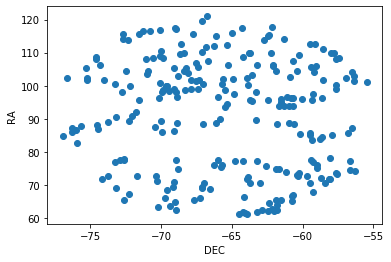

In [6]:
#plotting locations of heremes for stellar types i care about

cuthermes_ra = df_tcut_hermes.ra
cuthermes_dec = df_tcut_hermes.dec
cuthermes_tics = df_tcut_hermes.tic_id

plt.scatter(cuthermes_dec,cuthermes_ra)
plt.xlabel('DEC')
plt.ylabel('RA')

# pulling lcs from tcut Hermes

In [7]:
# need a way to cycle through lightcurves and save them under tic id as fn

In [10]:
lcfiles = lk.search_lightcurvefile(cuthermes_tics[14]).download_all()

In [394]:
cuthermes_tics[0] #[2,4,5,] empty mast search
# [1,3,6,7,8,9,10,11,12,13] had err: Warning: 31% (6168/19692) of the cadences will be ignored due to the quality mask (quality_bitmask=175).

141436075

In [9]:
# this quit after 8 pulls b/c reached max retries with url for stsci mast
#tried to pull lcs for temp cut tics


# all_lcs=[]
# for tic in cuthermes_tics:
#     tics = 'TIC ' + str(tic)
#    # print(tics)
#     #break
#     each_lcs = lk.search_lightcurvefile(tics).download_all()
#     all_lcs.append(each_lcs) 

# 2nd MAST pull

In [54]:
MAST_DF = pd.read_csv('data/MAST_2019-09-30T1928.csv',skiprows=4)
MAST_DF
#tic id = target_name

dataproduct_type  calib_level obs_collection  \
0            timeseries            3           TESS   
1            timeseries            3           TESS   
2            timeseries            3           TESS   
3            timeseries            3           TESS   
4            timeseries            3           TESS   
...                 ...          ...            ...   
129680       timeseries            3           TESS   
129681       timeseries            3           TESS   
129682       timeseries            3           TESS   
129683       timeseries            3           TESS   
129684       timeseries            3           TESS   

                                                   obs_id target_name  \
0         tess2018263035959-s0003-0000000177254872-0123-s   177254872   
1         tess2018263035959-s0003-0000000142143115-0123-s   142143115   
2         tess2018263035959-s0003-0000000142109185-0123-s   142109185   
3         tess2018263035959-s0003-0000000033839044-0123-s    33839044   
4         tess2018263035959-s0003-0000000033733169-0123-s    33733169   
...                                                   ...         ...   
129680    tess2019169103026-s0013-0000000421911792-0146-s   421911792   
129681  tess2018206190142-s0001-s0013-0000000220454990...   220454990   
129682  tess2018206190142-s0001-s0013-0000000089787778...    89787778   
129683  tess2018206190142-s0001-s0013-0000000382160308...   382160308   
129684  tess2018206190142-s0001-s0013-0000000463202584...   463202584   

              s_ra      s_dec         t_min         t_max  t_exptime  ...  \
0       101.714967 -75.232706  58381.533115  58408.883108      120.0  ...   
1        99.502448 -72.486324  58381.533115  58408.883108      120.0  ...   
2        99.433984 -76.926875  58381.533115  58408.883108      120.0  ...   
3        64.626200 -72.829800  58381.533115  58408.883108      120.0  ...   
4        61.869300 -73.688800  58381.533115  58408.883108      120.0  ...   
...            ...        ...           ...           ...        ...  ...   
129680  288.016590 -56.049540  58653.413553  58681.856597      120.0  ...   
129681   74.274884 -55.612442  58381.197855  58681.856079      120.0  ...   
129682  127.820080 -59.227073  58516.841355  58595.181722      120.0  ...   
129683   80.921300 -58.558100  58324.792472  58681.856104      120.0  ...   
129684  153.218148 -58.613605  58542.717234  58595.182931      120.0  ...   

       provenance_name                                          s_region  \
0                 SPOC  CIRCLE ICRS 101.71496700 -75.23270600 0.00138889   
1                 SPOC   CIRCLE ICRS 99.50244800 -72.48632400 0.00138889   
2                 SPOC   CIRCLE ICRS 99.43398400 -76.92687500 0.00138889   
3                 SPOC   CIRCLE ICRS 64.62620000 -72.82980000 0.00138889   
4                 SPOC   CIRCLE ICRS 61.86930000 -73.68880000 0.00138889   
...                ...                                               ...   
129680            SPOC  CIRCLE ICRS 288.01659000 -56.04954000 0.00138889   
129681            SPOC   CIRCLE ICRS 74.27488400 -55.61244200 0.00138889   
129682            SPOC  CIRCLE ICRS 127.82008000 -59.22707300 0.00138889   
129683            SPOC   CIRCLE ICRS 80.92130000 -58.55810000 0.00138889   
129684            SPOC  CIRCLE ICRS 153.21814800 -58.61360500 0.00138889   

        jpegURL                                            dataURL  \
0           NaN  mast:TESS/product/tess2018263035959-s0003-0000...   
1           NaN  mast:TESS/product/tess2018263035959-s0003-0000...   
2           NaN  mast:TESS/product/tess2018263035959-s0003-0000...   
3           NaN  mast:TESS/product/tess2018263035959-s0003-0000...   
4           NaN  mast:TESS/product/tess2018263035959-s0003-0000...   
...         ...                                                ...   
129680      NaN  mast:TESS/product/tess2019169103026-s0013-0000...   
129681      NaN  mast:TESS/product/tess2018206190142-s0001-s001...   
1

In [80]:
#setting easy ways to call the parameters i care about
mast_tics_bad = MAST_DF.target_name.values
mast_decs2 = MAST_DF.s_dec.values
mast_ras2 = MAST_DF.s_ra

len(mast_decs2)
type(mast_tics2)
type(hermes_tics)
mast_tics_bad
#mast_decs2

array(['177254872', '142143115', '142109185', ..., '89787778',
       '382160308', '463202584'], dtype=object)

In [95]:
len(mast_tics_bad),len(mast_tics2)

(129685, 129602)

In [96]:
#fixing tics to not have ''


mast_tics2=[]
for count,i in enumerate(mast_tics_bad): #had to chop last value so real last tic is 141528060
    #print(type(i))
    #print(i)
    if i == 'TESS FFI':
        #print(count,i)
        nums = np.nan
    else:
        num = int(i) #int(i)
        mast_tics2.append(num)
    #break
mast_tics2=np.array(mast_tics2)
mast_tics2

array([177254872, 142143115, 142109185, ...,  89787778, 382160308,
       463202584])

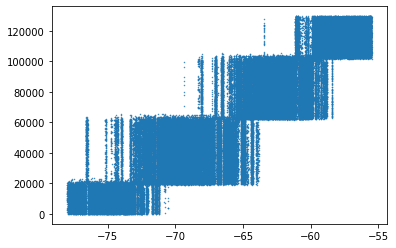

In [59]:
#plt.plot(len(mast_decs2),mast_decs2)
mast2_ys = np.arange(0,len(mast_decs2),1)
plt.scatter(mast_decs2,mast2_ys,s=0.2)

# cross match mast2pull & hermes

In [97]:
mast_tics2

array([177254872, 142143115, 142109185, ...,  89787778, 382160308,
       463202584])

In [98]:
#first make array types match (as np)

mast_tics2 = np.array(mast_tics2)
print(hermes_tics,mast_tics2)

[141436215 364588968 364589323 ... 348843627 278723918 278685716] [177254872 142143115 142109185 ...  89787778 382160308 463202584]


In [101]:
hermes_tics

array([141436215, 364588968, 364589323, ..., 348843627, 278723918,
       278685716])

In [100]:
matches = mast_tics2[np.where(mast_tics2 == hermes_tics)]
matches

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], dtype=int64)

In [125]:
#testing above to see if code prob or really no matches
#its a code prob


arr1 = np.array([1,2,3,4,5])
arr2 = np.array([6,7,8,2,3])
m = arr1[np.where(arr1==arr2)]
m
for val in arr1:
    if val in arr2:
        print(val)

2
3


# CONTINUE ABOVE^^^^^^^^^

# creating new files containing ALL the hermes TICs

In [182]:
#how to save data as a csv

df = pd.DataFrame(dict({'tic_id': hermes_tics})) #make array a df
#df
df.to_csv('data/hermes-tics.csv') #save that df as csv

In [172]:
#how to read tics csv file


df = pd.read_csv('data/hermes-tics.csv')

In [113]:
#how to see data structure


df.tic_id.values #remove '.values' to get column structure

array([141436215, 364588968, 364589323, ..., 348843627, 278723918,
       278685716])

# exploring lightcurves of those TICs

In [17]:
#making tic id in format to sub in a lightkurve search

starnames =[]
for i in hermes_tics:
    names = 'TIC ' + str(i)
    starnames.append(names)
starnames = np.array(starnames)
starnames[0:5]


array(['TIC 141436215', 'TIC 364588968', 'TIC 364589323', 'TIC 141436204',
       'TIC 141478874'], dtype='<U13')

In [372]:
starnames[0]
len(starnames)

24968

In [49]:
#starname = "TIC 364588968"

# for stars in starnames:
#     print(stars)
lcf = lk.search_lightcurvefile(starnames[0]).download_all() #this fcn searches lightcurves, not the raw data



In [348]:
lcf1 = lk.search_lightcurvefile(starnames[1]).download_all() #this fcn searches lightcurves, not the raw data
#THIS COMES BACK WITH NO RESULT


/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:227: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


# Example of multiple lcs...10

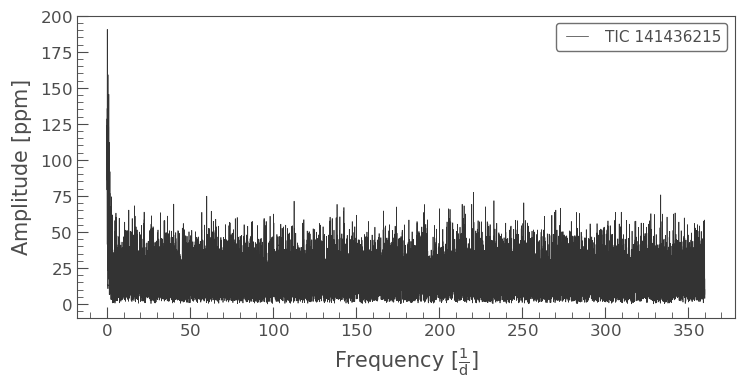

In [84]:
# lsp = lk.periodogram.LombScarglePeriodogram(lcf[0],power=(19*u.s))
# lsp.plot()
# lsp = lk.periodogram.LombScarglePeriodogram.from_lightcurve(lcf[3])
# lsp.plot()
lc2 = lcf[0].PDCSAP_FLUX.remove_nans()
lsp = lc2.to_periodogram(method='lombscargle',freq_unit=(1/u.d))
lsp.plot()

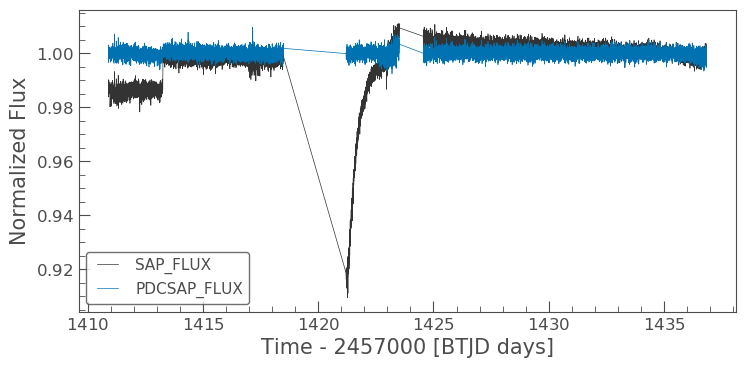

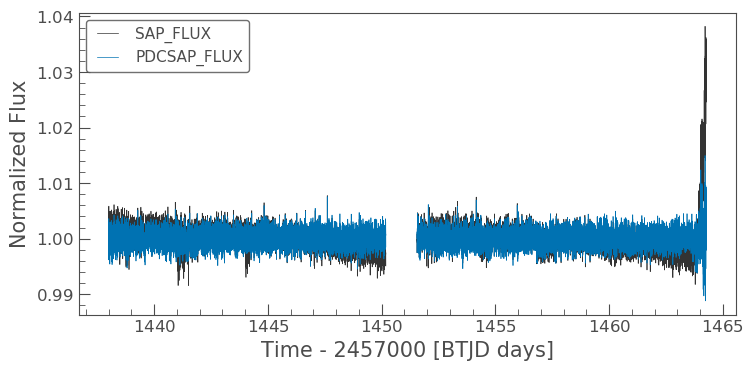

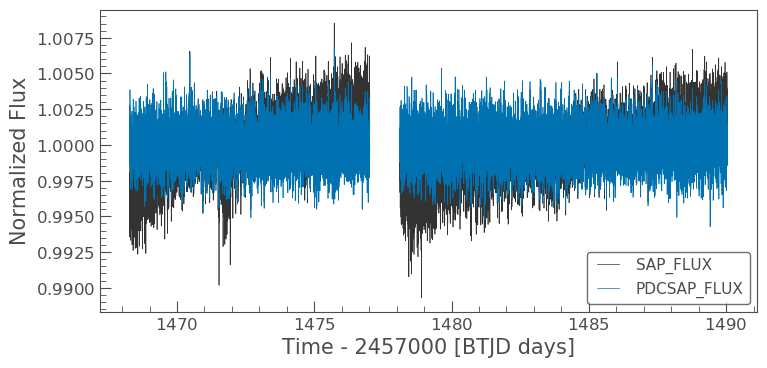

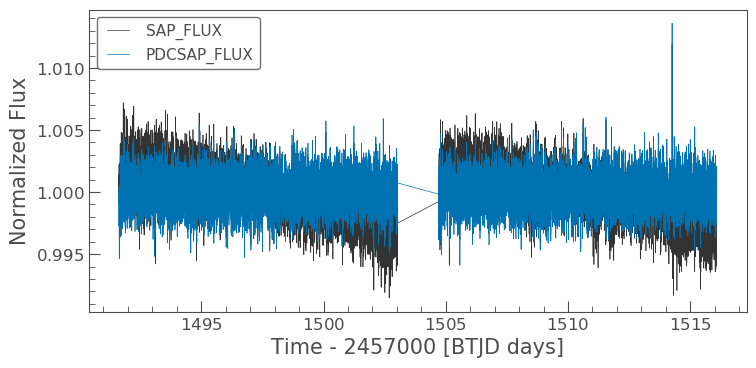

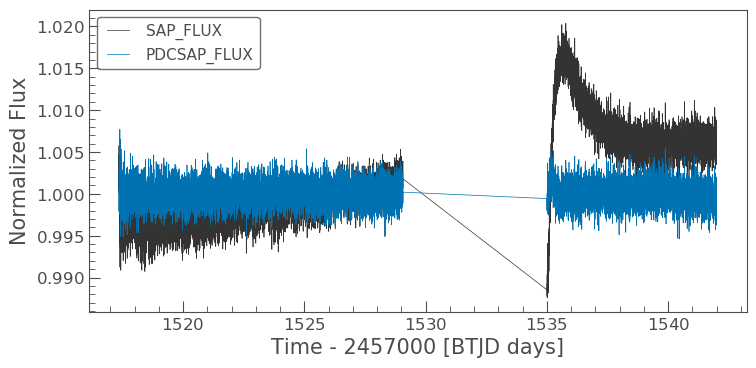

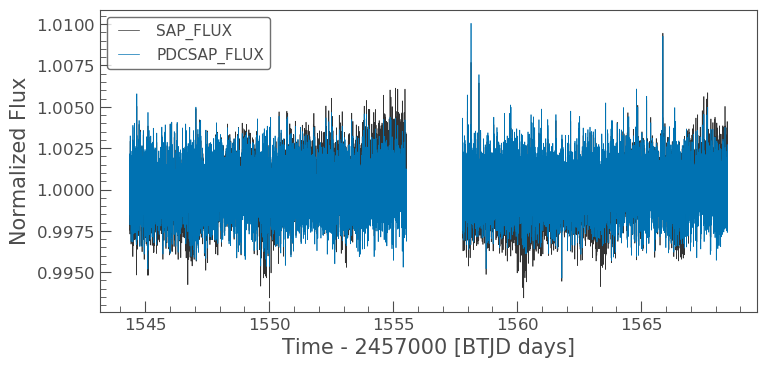

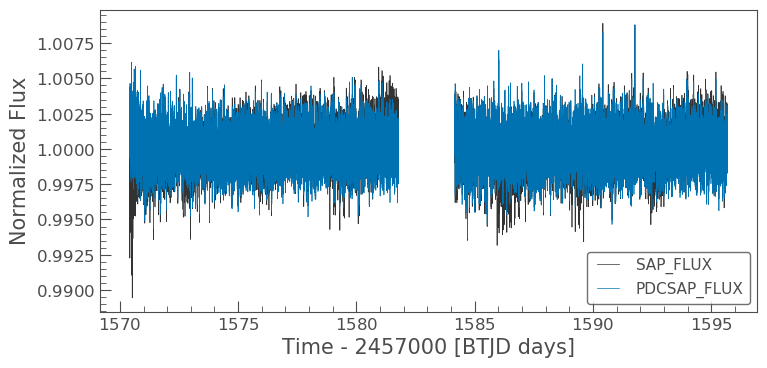

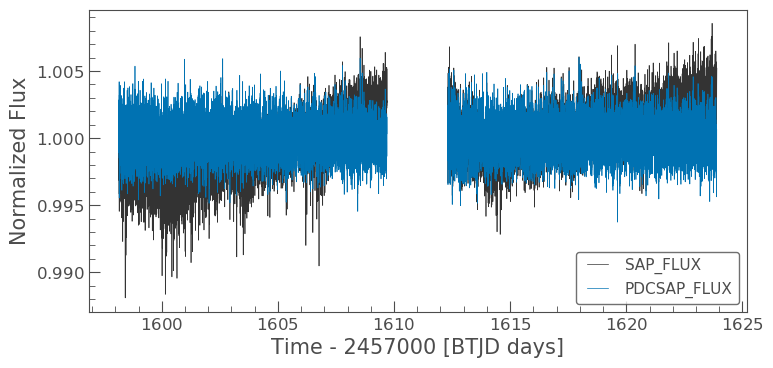

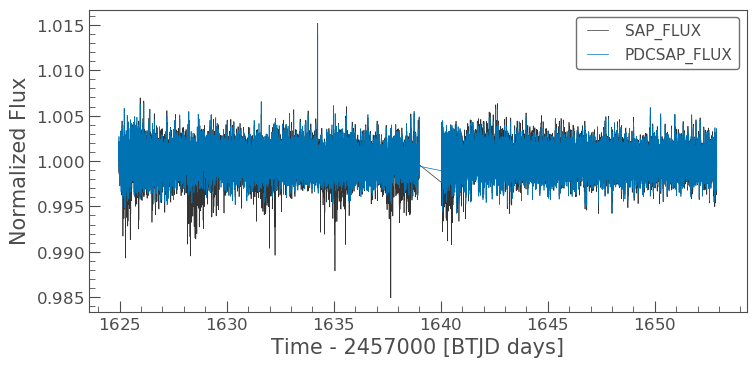

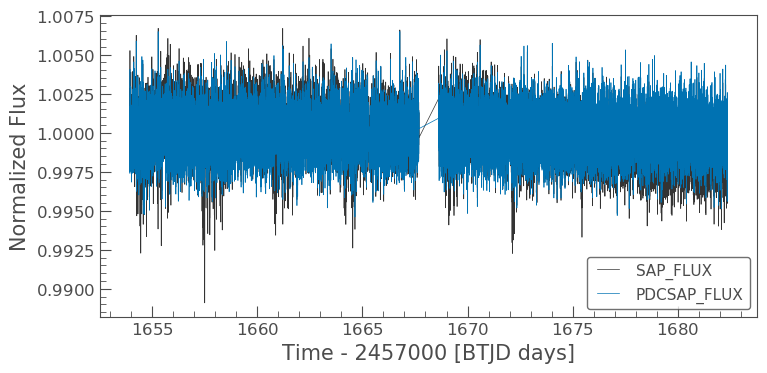

In [61]:
for i in range(len(lcf)):
    lcf[i].plot()

In [44]:
#trying to dl hermes tic lightcurves FOR THE FIRST 10 TICS ONLY!!! 

lightcurves = []
for i in range(0,10): #len(starnames)):
    lcs = lk.search_lightcurvefile(starnames[i]).download()
    lightcurves.append(lcs)
lightcurves = np.array(lightcurves)
print(lightcurves.shape)

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:185: LightkurveWarning: Warning: 10 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:177: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:177: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:177: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:177: LightkurveWarning: Cannot download from an empty se

(10,) <bound method LightCurveFile.plot of TessLightCurveFile(TICID: 141436215)>


In [376]:
np.shape(lightcurves), np.shape(lightcurves[0]),np.shape(lightcurves[9]),starnames[0],starnames[9]
#so all lightcurves are just from first tic b/c didnt use 'download_all()'

((10,), (), (), 'TIC 141436215', 'TIC 141473617')

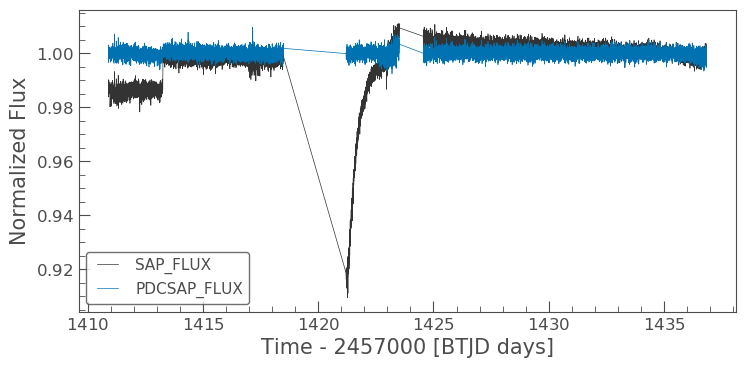

In [47]:
lightcurves[0].plot()

In [36]:
#checking how big each lc is and how big the total would be for external harddrive needs


# for number,stars in enumerate(starnames):
#     print(stars,number)

print('lcf is size:',sys.getsizeof(lcf),'bytes',len(starnames))
totalsize = len(starnames) * int(sys.getsizeof(lcf))
print('based on that estimate of one lc, for all lightcurves total size is:',totalsize, 'bytes')

lcf is size: 56 bytes 24968
based on that estimate of one lc, for all lightcurves total size is: 1398208 bytes


In [21]:
#not sure i need, but this is for 2min cadence targets and thats what i want
from lightkurve import TessTargetPixelFile



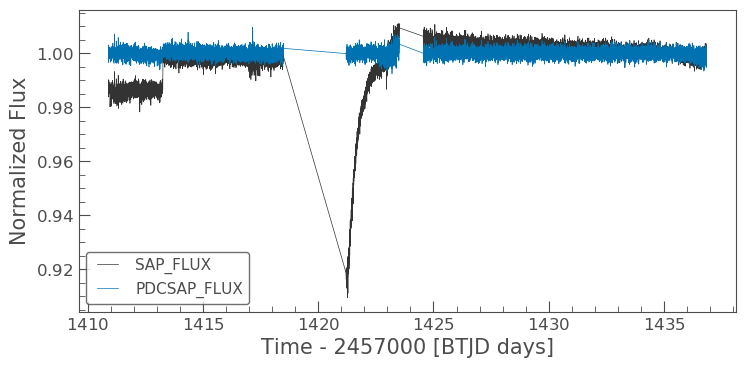

In [24]:
#first in cvz list
lcf.plot()

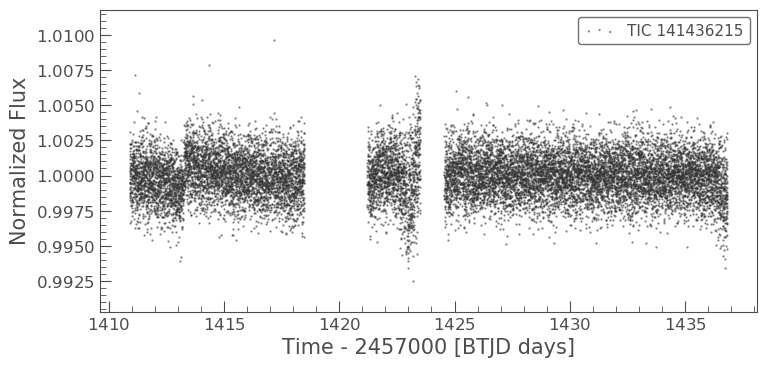

In [25]:
lc = lcf.PDCSAP_FLUX
lc.scatter(alpha=.5, s=.5);

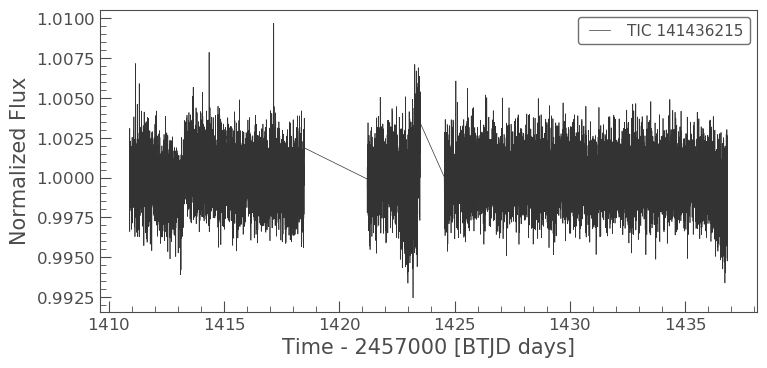

In [27]:
lc.plot()

# attempting periodograms

In [28]:
#trying to transform to a periodogram

lc = lc.normalize().remove_nans().remove_outliers()
#p = lc.to_periodogram(freq_unit=u.microHertz, max_frequency=400, min_frequency=10)
p = lc.to_periodogram(freq_unit=(1/(u.s*24*60*60)), max_frequency=10, min_frequency=(1/20.))



/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:733: LightkurveWarning: `min_frequency` keyword is deprecated, please use `minimum_frequency` instead.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:738: LightkurveWarning: `max_frequency` keyword is deprecated, please use `maximum_frequency` instead.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:744: LightkurveWarning: Input light curve will be normalized.
  LightkurveWarning)


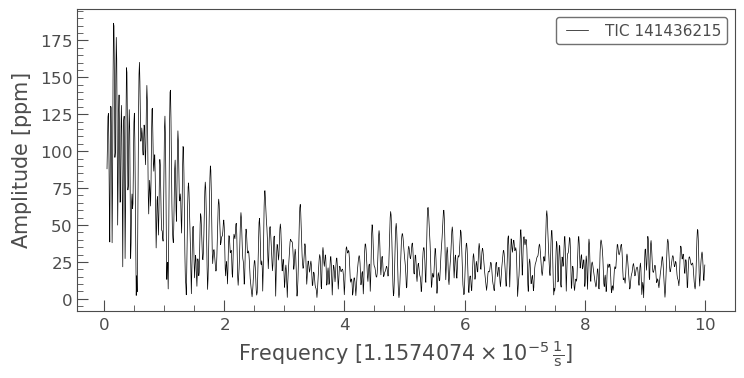

In [29]:
ax = p.plot(c='k');


# trying astroquery

In [187]:
from astroquery.mast import Catalogs

catalog_data = Catalogs.query_criteria(catalog="Tic",Bmag=[30,50],objType="STAR")
print(catalog_data)
#catalog_data.columns
#catalog_data['dec']
catalog_data.info

    ID    version  HIP TYC ...     e_Dec_orig     raddflag wdflag   objID   
--------- -------- --- --- ... ------------------ -------- ------ ----------
282391528 20190415  --  -- ...   0.47766300834538        0      0  575845603
463721073 20190415  --  -- ...  0.489828592248652       -1      1  711478025
261459129 20190415  --  -- ...  0.200397148604244        1      0 1702873185
 94322581 20190415  --  -- ...  0.205286802302475        1      0  607224357
125414201 20190415  --  -- ...   0.22398993783274        1      0  580948886
123585000 20190415  --  -- ...  0.618316068787371        0      0  575633285
260216294 20190415  --  -- ...  0.187170498094167        1      0  684547403
125413929 20190415  --  -- ...  0.293682765259495        1      0  580948616
 64575709 20190415  --  -- ...   0.21969663115091        1      0  596904426
282024596 20190415  --  -- ...  0.548806522539047        1      0  574886471
406300991 20190415  --  -- ... 0.0518318978617112        0      0 1412706928

<Table masked=True length=13>
     name      dtype  n_bad
------------- ------- -----
           ID    str9     0
      version    str8     0
          HIP   int64    13
          TYC    str1    13
         UCAC   str10    12
      TWOMASS   str16     0
         SDSS    str1    13
      ALLWISE   str19    10
         GAIA   str19     1
        APASS    str1    13
          KIC   int64    13
      objType    str4     0
      typeSrc    str7     0
           ra float64     0
          dec float64     0
      POSflag    str7     0
         pmRA float64     8
       e_pmRA float64     8
        pmDEC float64     8
      e_pmDEC float64     8
       PMflag    str5     8
          plx float64    10
        e_plx float64    10
      PARflag    str5    10
      gallong float64     0
       gallat float64     0
       eclong float64     0
        eclat float64     0
         Bmag float64     0
       e_Bmag float64     2
         Vmag float64     1
       e_Vmag float64     1
         umag floa

# using mast to get list of tics to prepare for bulk dl

In [92]:
ecliptic_tics = pd.read_csv('MAST_2019-09-24T1446.csv', skiprows=2) #not sure how many lines to skip b/c want datatype info
ecliptic_tics

#dataproduct_type  calib_level  obs_collection  \
0              #@string          int          string   
1      dataproduct_type  calib_level  obs_collection   
2            timeseries            3            TESS   
3            timeseries            3            TESS   
4            timeseries            3            TESS   
5            timeseries            3            TESS   
6            timeseries            3            TESS   
7            timeseries            3            TESS   
8            timeseries            3            TESS   
9            timeseries            3            TESS   
10           timeseries            3            TESS   
11           timeseries            3            TESS   
12           timeseries            3            TESS   
13           timeseries            3            TESS   
14           timeseries            3            TESS   
15           timeseries            3            TESS   
16           timeseries            3            TESS   
17           timeseries            3            TESS   
18           timeseries            3            TESS   
19           timeseries            3            TESS   
20           timeseries            3            TESS   
21           timeseries            3            TESS   
22           timeseries            3            TESS   
23           timeseries            3            TESS   
24           timeseries            3            TESS   
25           timeseries            3            TESS   
26           timeseries            3            TESS   
27           timeseries            3            TESS   
28           timeseries            3            TESS   
29           timeseries            3            TESS   
...                 ...          ...             ...   
9985         timeseries            3            TESS   
9986         timeseries            3            TESS   
9987         timeseries            3            TESS   
9988         timeseries            3            TESS   
9989         timeseries            3            TESS   
9990         timeseries            3            TESS   
9991         timeseries            3            TESS   
9992         timeseries            3            TESS   
9993         timeseries            3            TESS   
9994         timeseries            3            TESS   
9995         timeseries            3            TESS   
9996         timeseries            3            TESS   
9997         timeseries            3            TESS   
9998         timeseries            3            TESS   
9999         timeseries            3            TESS   
10000        timeseries            3            TESS   
10001        timeseries            3            TESS   
10002        timeseries            3            TESS   
10003        timeseries            3            TESS   
10004        timeseries            3            TESS   
10005        timeseries            3            TESS   
10006        timeseries            3            TESS   
10007        timeseries            3            TESS   
10008        timeseries            3            TESS   
10009        timeseries            3            TESS   
10010        timeseries            3            TESS   
10011        timeseries            3            TESS   
10012        timeseries            3            TESS   
10013        timeseries            3            TESS   
10014        timeseries            3            TESS   

                                                  obs_id  target_name  \
0                                                 string       string   
1                                                 obs_id  target_name   
2        tess2019140104343-s0012-0000000384484766-0144-s    384484766   
3        tess2019169103026-s0013-0000000383355075-0146-s    383355075   
4      tess2018206190142-s0001-s0013-0000000261264800...    261264800   
5        tess2019112060037-s0011-0000000418337782-0143-s    418337782   
6        tess201916910

In [94]:
ecliptic_tics.keys

<bound method NDFrame.keys of       #dataproduct_type  calib_level  obs_collection  \
0              #@string          int          string   
1      dataproduct_type  calib_level  obs_collection   
2            timeseries            3            TESS   
3            timeseries            3            TESS   
4            timeseries            3            TESS   
5            timeseries            3            TESS   
6            timeseries            3            TESS   
7            timeseries            3            TESS   
8            timeseries            3            TESS   
9            timeseries            3            TESS   
10           timeseries            3            TESS   
11           timeseries            3            TESS   
12           timeseries            3            TESS   
13           timeseries            3            TESS   
14           timeseries            3            TESS   
15           timeseries            3            TESS   
16           times

In [97]:
ecliptic_tics.columns

Index(['#dataproduct_type', ' calib_level', ' obs_collection', ' obs_id',
       ' target_name', ' s_ra', ' s_dec', ' t_min', ' t_max', ' t_exptime',
       ' wavelength_region', ' filters', ' em_min', ' em_max',
       ' target_classification', ' obs_title', ' t_obs_release',
       ' instrument_name', ' proposal_pi', ' proposal_id', ' proposal_type',
       ' project', ' sequence_number', ' provenance_name', ' s_region',
       ' jpegURL', ' dataURL', ' dataRights', ' mtFlag', ' srcDen',
       ' intentType', ' obsid', ' objID'],
      dtype='object')

In [108]:
tics = ecliptic_tics[' target_name'] #it needs the space before target
tics.shape #includes 2 top lines that arent data
tics[2::].values #only the tics

array(['384484766', '383355075', '261264800', ..., '280865951',
       '269796128', '393030999'], dtype=object)

In [109]:
#saving data as a csv

tic_df = pd.DataFrame(dict({'tic_id': tics[2::].values}))
tic_df.to_csv('data/cvz-tics.csv')

In [116]:
df.shape, tic_df.shape

((24968, 2), (10013, 1))

# trying to match MAST dl with Hermes TICs

In [173]:
#dont think i really wanna do this


# merged = pd.merge(df, tic_df, on = ['tic_id']) #, left_on = ['tic_id'], right_on = ['tic_id'])
# merged

In [122]:
type(df['tic_id']) #Hermes

pandas.core.series.Series

In [123]:
type(tic_df['tic_id']) #MAST

pandas.core.series.Series

In [148]:
matches = np.where(df.values == tic_df.values)
matches

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

In [167]:
#test to see if this works b/c using known values from both arrays

inthere = pd.DataFrame({"tic_id":[141436215,364588968, 364589323]}) #these are first 3 values in df

matches = []
for i in tics: #inthere.values: #tic_df.values:
    #print(i)
    if i in df.values:
        print(i)
        matches.append(i)
matches

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


[]

In [232]:
mast_decs = ecliptic_tics[' s_dec']

# Second tic dl from MAST

In [352]:
MAST_tics2 = pd.read_csv('data/MAST_2019-09-30T1928.csv', skiprows=4) #not sure how many lines to skip b/c want datatype info
MAST_tics2

dataproduct_type  calib_level obs_collection  \
0            timeseries            3           TESS   
1            timeseries            3           TESS   
2            timeseries            3           TESS   
3            timeseries            3           TESS   
4            timeseries            3           TESS   
5            timeseries            3           TESS   
6            timeseries            3           TESS   
7            timeseries            3           TESS   
8            timeseries            3           TESS   
9            timeseries            3           TESS   
10           timeseries            3           TESS   
11           timeseries            3           TESS   
12           timeseries            3           TESS   
13           timeseries            3           TESS   
14           timeseries            3           TESS   
15           timeseries            3           TESS   
16           timeseries            3           TESS   
17           timeseries            3           TESS   
18           timeseries            3           TESS   
19           timeseries            3           TESS   
20           timeseries            3           TESS   
21           timeseries            3           TESS   
22           timeseries            3           TESS   
23           timeseries            3           TESS   
24           timeseries            3           TESS   
25           timeseries            3           TESS   
26           timeseries            3           TESS   
27           timeseries            3           TESS   
28           timeseries            3           TESS   
29           timeseries            3           TESS   
...                 ...          ...            ...   
129655       timeseries            3           TESS   
129656       timeseries            3           TESS   
129657       timeseries            3           TESS   
129658       timeseries            3           TESS   
129659       timeseries            3           TESS   
129660       timeseries            3           TESS   
129661       timeseries            3           TESS   
129662       timeseries            3           TESS   
129663       timeseries            3           TESS   
129664       timeseries            3           TESS   
129665       timeseries            3           TESS   
129666       timeseries            3           TESS   
129667       timeseries            3           TESS   
129668       timeseries            3           TESS   
129669       timeseries            3           TESS   
129670       timeseries            3           TESS   
129671       timeseries            3           TESS   
129672       timeseries            3           TESS   
129673       timeseries            3           TESS   
129674       timeseries            3           TESS   
129675       timeseries            3           TESS   
129676       timeseries            3           TESS   
129677       timeseries            3           TESS   
129678       timeseries            3           TESS   
129679       timeseries            3           TESS   
129680       timeseries            3           TESS   
129681       timeseries            3           TESS   
129682       timeseries            3           TESS   
129683       timeseries            3           TESS   
129684       timeseries            3           TESS   

                                                   obs_id target_name  \
0         tess2018263035959-s0003-0000000177254872-0123-s   177254872   
1         tess2018263035959-s0003-0000000142143115-0123-s   142143115   
2         tess2018263035959-s0003-0000000142109185-0123-s   142109185   
3         tess2018263035959-s0003-0000000033839044-0123-s    33839044   
4         tess2018263035959-s0003-0000000033733169-0123-s    33733169   
5         tess2018263035959-s0003-0000000272004386-0123-s   272004386   
6         tess2018263035959-s0003-0000000177256886-0123-s   177256886   
7         te

In [354]:
tics2 = MAST_tics2['target_name'] #it needs the space before target
tics2.shape

(129685,)

In [355]:
# trying to match MAST2 with Hermes


matches2 = np.where(df.values == tics2.values)
matches2

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


(array([], dtype=int64),)

# ---------------------- Interns stuff --------------------------------

In [189]:
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML


In [190]:
def f(x,y):
    return np.sin(x) + np.cos(y)

def updatefig(*args):
    global x,y
    x += np.pi / -25.
    y += np.pi / 20.
    im.set_array(f(x,y))
    return im,

In [191]:
x = np.linspace(0, 4 * np.pi, 120)
y = np.linspace(0, 4 * np.pi, 100).reshape(-1,1)

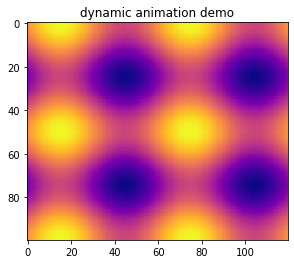

In [192]:
fig = plt.figure()
plt.title('dynamic animation demo')
im = plt.imshow(f(x,y), animated = True, cmap='plasma')

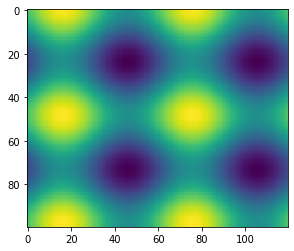

In [199]:
plt.imshow(f(x,y))

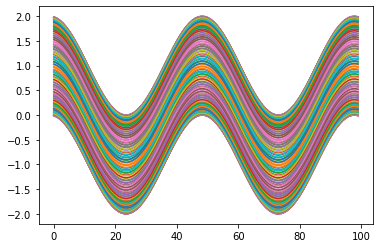

In [198]:
plt.plot(f(x,y));

In [244]:
x = np.linspace(0,100,10)
a = np.sin(x)
#plt.plot(len(x),a);

In [209]:
a

array([ 0.        , -0.99333304, -0.22902277,  0.94052958,  0.44587117,
       -0.83772956, -0.63901801,  0.69039764,  0.79819602, -0.50636564])

In [288]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"}, inplace=True)

In [289]:
df.columns

Index(['a', 'c'], dtype='object')

# fixing sunspot data for interns

In [129]:
spots = pd.read_csv('intern-stuff/SN_d_tot_V2.0.csv',delimiter=';')
year = spots.iloc[:14,::] #[spots.columns[0]] #   iloc[::,:1818] #[rows,columns]
year

1818  01  01.1  1818.001    -1   -1.0     0  1
0   1818   1     2  1818.004    -1   -1.0     0  1
1   1818   1     3  1818.007    -1   -1.0     0  1
2   1818   1     4  1818.010    -1   -1.0     0  1
3   1818   1     5  1818.012    -1   -1.0     0  1
4   1818   1     6  1818.015    -1   -1.0     0  1
5   1818   1     7  1818.018    -1   -1.0     0  1
6   1818   1     8  1818.021    65   10.2     1  1
7   1818   1     9  1818.023    -1   -1.0     0  1
8   1818   1    10  1818.026    -1   -1.0     0  1
9   1818   1    11  1818.029    -1   -1.0     0  1
10  1818   1    12  1818.032    -1   -1.0     0  1
11  1818   1    13  1818.034    37    7.7     1  1
12  1818   1    14  1818.037    -1   -1.0     0  1
13  1818   1    15  1818.040    -1   -1.0     0  1

## fix below b/c numperday is really smoothed average & need to remove mask values of -1/-1.0

In [130]:
#changes column names but by replacing 1/1/1818 day's data


spots.rename(columns={"1818": "year", "01": "month", "01.1": "day", "1818.001": "numperday", "  -1": "idk1", " -1.0": "idk2", "   0": "idk3", "1": "idk4"}, inplace=True)
spots.columns

Index(['year', 'month', 'day', 'numperday', 'idk1', 'idk2', 'idk3', 'idk4'], dtype='object')

In [141]:
a = spots['year'] #time
b = spots['month'] #not sure how to use
c = spots['day']
d = spots['numperday']
e = spots['idk1'] #spots
f = spots['idk2']#spots
g = spots['idk3'] #shows increased activity in later years
h = spots['idk4']

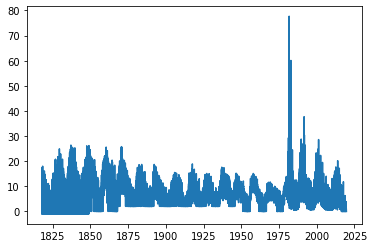

In [149]:
plt.plot(d,f)

In [140]:
#its not numperday its smoothed average





#year['1818;01;01;1818.001;  -1; -1.0;   0;1']
#spots['numperday'][::4] #this grabbed every 4th row 0,4,8,12,etc

dailyspots = []
baddata = spots['numperday'][::] #its not numperday its smoothed average
for row in baddata:
    #maybe = map(int, str(row).split('.'))
    #map(int, str(row).split('.'))
    #print(maybe)
    year, daily = [int(s) for s in str(row).split('.')] #try making this a float
    print(row,year, daily)
    rdaily = round(daily,3) #this isnt right but need to round values
    dailyspots.append(rdaily)
#dailyspots

1818.004 1818 4
1818.007 1818 7
1818.01 1818 1
1818.0120000000002 1818 120000000002
1818.015 1818 15
1818.0179999999998 1818 179999999998
1818.021 1818 21
1818.023 1818 23
1818.026 1818 26
1818.029 1818 29
1818.0320000000002 1818 320000000002
1818.0339999999999 1818 339999999999
1818.037 1818 37
1818.04 1818 4
1818.0420000000001 1818 420000000001
1818.045 1818 45
1818.0479999999998 1818 479999999998
1818.0510000000002 1818 510000000002
1818.0529999999999 1818 529999999999
1818.056 1818 56
1818.059 1818 59
1818.0620000000001 1818 620000000001
1818.0639999999999 1818 639999999999
1818.067 1818 67
1818.07 1818 7
1818.0729999999999 1818 729999999999
1818.075 1818 75
1818.078 1818 78
1818.0810000000001 1818 810000000001
1818.0839999999998 1818 839999999998
1818.086 1818 86
1818.089 1818 89
1818.092 1818 92
1818.095 1818 95
1818.0970000000002 1818 970000000002
1818.1 1818 1
1818.1029999999998 1818 1029999999998
1818.105 1818 105
1818.108 1818 108
1818.111 1818 111
1818.114 1818 114
1818.116 

1821.2179999999998 1821 2179999999998
1821.221 1821 221
1821.223 1821 223
1821.226 1821 226
1821.229 1821 229
1821.2320000000002 1821 2320000000002
1821.234 1821 234
1821.237 1821 237
1821.24 1821 24
1821.2420000000002 1821 2420000000002
1821.245 1821 245
1821.2479999999998 1821 2479999999998
1821.251 1821 251
1821.253 1821 253
1821.256 1821 256
1821.259 1821 259
1821.2620000000002 1821 2620000000002
1821.264 1821 264
1821.267 1821 267
1821.27 1821 27
1821.273 1821 273
1821.275 1821 275
1821.2779999999998 1821 2779999999998
1821.281 1821 281
1821.2839999999999 1821 2839999999999
1821.286 1821 286
1821.289 1821 289
1821.2920000000001 1821 2920000000001
1821.295 1821 295
1821.297 1821 297
1821.3 1821 3
1821.3029999999999 1821 3029999999999
1821.305 1821 305
1821.308 1821 308
1821.3110000000001 1821 3110000000001
1821.3139999999999 1821 3139999999999
1821.316 1821 316
1821.319 1821 319
1821.3220000000001 1821 3220000000001
1821.325 1821 325
1821.3270000000002 1821 3270000000002
1821.33 18

1824.81 1824 81
1824.8129999999999 1824 8129999999999
1824.816 1824 816
1824.818 1824 818
1824.8210000000001 1824 8210000000001
1824.8239999999998 1824 8239999999998
1824.8270000000002 1824 8270000000002
1824.829 1824 829
1824.832 1824 832
1824.835 1824 835
1824.8370000000002 1824 8370000000002
1824.84 1824 84
1824.8429999999998 1824 8429999999998
1824.846 1824 846
1824.848 1824 848
1824.851 1824 851
1824.854 1824 854
1824.8570000000002 1824 8570000000002
1824.859 1824 859
1824.862 1824 862
1824.865 1824 865
1824.8670000000002 1824 8670000000002
1824.87 1824 87
1824.8729999999998 1824 8729999999998
1824.876 1824 876
1824.878 1824 878
1824.881 1824 881
1824.884 1824 884
1824.8870000000002 1824 8870000000002
1824.889 1824 889
1824.892 1824 892
1824.895 1824 895
1824.898 1824 898
1824.9 1824 9
1824.9029999999998 1824 9029999999998
1824.906 1824 906
1824.908 1824 908
1824.911 1824 911
1824.914 1824 914
1824.9170000000001 1824 9170000000001
1824.9189999999999 1824 9189999999999
1824.922 182

1828.02 1828 2
1828.023 1828 23
1828.026 1828 26
1828.029 1828 29
1828.031 1828 31
1828.0339999999999 1828 339999999999
1828.037 1828 37
1828.04 1828 4
1828.0420000000001 1828 420000000001
1828.045 1828 45
1828.0479999999998 1828 479999999998
1828.0510000000002 1828 510000000002
1828.0529999999999 1828 529999999999
1828.056 1828 56
1828.059 1828 59
1828.0610000000001 1828 610000000001
1828.0639999999999 1828 639999999999
1828.067 1828 67
1828.07 1828 7
1828.0720000000001 1828 720000000001
1828.075 1828 75
1828.078 1828 78
1828.0810000000001 1828 810000000001
1828.0829999999999 1828 829999999999
1828.086 1828 86
1828.089 1828 89
1828.092 1828 92
1828.094 1828 94
1828.0970000000002 1828 970000000002
1828.1 1828 1
1828.102 1828 102
1828.105 1828 105
1828.108 1828 108
1828.111 1828 111
1828.1129999999998 1828 1129999999998
1828.116 1828 116
1828.119 1828 119
1828.122 1828 122
1828.124 1828 124
1828.1270000000002 1828 1270000000002
1828.13 1828 13
1828.1329999999998 1828 1329999999998
1828.

1830.777 1830 777
1830.779 1830 779
1830.7820000000002 1830 7820000000002
1830.785 1830 785
1830.7879999999998 1830 7879999999998
1830.79 1830 79
1830.793 1830 793
1830.796 1830 796
1830.799 1830 799
1830.8010000000002 1830 8010000000002
1830.8039999999999 1830 8039999999999
1830.807 1830 807
1830.81 1830 81
1830.8120000000001 1830 8120000000001
1830.815 1830 815
1830.818 1830 818
1830.8210000000001 1830 8210000000001
1830.8229999999999 1830 8229999999999
1830.826 1830 826
1830.829 1830 829
1830.832 1830 832
1830.8339999999998 1830 8339999999998
1830.8370000000002 1830 8370000000002
1830.84 1830 84
1830.842 1830 842
1830.845 1830 845
1830.848 1830 848
1830.851 1830 851
1830.8529999999998 1830 8529999999998
1830.856 1830 856
1830.859 1830 859
1830.862 1830 862
1830.864 1830 864
1830.8670000000002 1830 8670000000002
1830.87 1830 87
1830.8729999999998 1830 8729999999998
1830.875 1830 875
1830.878 1830 878
1830.881 1830 881
1830.884 1830 884
1830.886 1830 886
1830.889 1830 889
1830.892 183

1833.741 1833 741
1833.744 1833 744
1833.747 1833 747
1833.749 1833 749
1833.7520000000002 1833 7520000000002
1833.755 1833 755
1833.7579999999998 1833 7579999999998
1833.76 1833 76
1833.763 1833 763
1833.766 1833 766
1833.7679999999998 1833 7679999999998
1833.771 1833 771
1833.774 1833 774
1833.777 1833 777
1833.779 1833 779
1833.7820000000002 1833 7820000000002
1833.785 1833 785
1833.7879999999998 1833 7879999999998
1833.79 1833 79
1833.793 1833 793
1833.796 1833 796
1833.799 1833 799
1833.8010000000002 1833 8010000000002
1833.8039999999999 1833 8039999999999
1833.807 1833 807
1833.81 1833 81
1833.8120000000001 1833 8120000000001
1833.815 1833 815
1833.818 1833 818
1833.8210000000001 1833 8210000000001
1833.8229999999999 1833 8229999999999
1833.826 1833 826
1833.829 1833 829
1833.832 1833 832
1833.8339999999998 1833 8339999999998
1833.8370000000002 1833 8370000000002
1833.84 1833 84
1833.842 1833 842
1833.845 1833 845
1833.848 1833 848
1833.851 1833 851
1833.8529999999998 1833 852999

1836.911 1836 911
1836.914 1836 914
1836.9170000000001 1836 9170000000001
1836.9189999999999 1836 9189999999999
1836.922 1836 922
1836.925 1836 925
1836.9279999999999 1836 9279999999999
1836.93 1836 93
1836.933 1836 933
1836.9360000000001 1836 9360000000001
1836.9389999999999 1836 9389999999999
1836.941 1836 941
1836.944 1836 944
1836.9470000000001 1836 9470000000001
1836.9489999999998 1836 9489999999998
1836.9520000000002 1836 9520000000002
1836.955 1836 955
1836.9579999999999 1836 9579999999999
1836.96 1836 96
1836.963 1836 963
1836.9660000000001 1836 9660000000001
1836.969 1836 969
1836.971 1836 971
1836.974 1836 974
1836.977 1836 977
1836.98 1836 98
1836.9820000000002 1836 9820000000002
1836.985 1836 985
1836.9879999999998 1836 9879999999998
1836.99 1836 99
1836.993 1836 993
1836.996 1836 996
1836.999 1836 999
1837.001 1837 1
1837.004 1837 4
1837.007 1837 7
1837.01 1837 1
1837.0120000000002 1837 120000000002
1837.015 1837 15
1837.0179999999998 1837 179999999998
1837.021 1837 21
183

1840.474 1840 474
1840.477 1840 477
1840.48 1840 48
1840.4820000000002 1840 4820000000002
1840.485 1840 485
1840.4879999999998 1840 4879999999998
1840.49 1840 49
1840.493 1840 493
1840.496 1840 496
1840.499 1840 499
1840.501 1840 501
1840.504 1840 504
1840.507 1840 507
1840.51 1840 51
1840.5120000000002 1840 5120000000002
1840.515 1840 515
1840.5179999999998 1840 5179999999998
1840.52 1840 52
1840.523 1840 523
1840.526 1840 526
1840.529 1840 529
1840.531 1840 531
1840.5339999999999 1840 5339999999999
1840.537 1840 537
1840.54 1840 54
1840.5420000000001 1840 5420000000001
1840.545 1840 545
1840.5479999999998 1840 5479999999998
1840.5510000000002 1840 5510000000002
1840.5529999999999 1840 5529999999999
1840.556 1840 556
1840.559 1840 559
1840.5610000000001 1840 5610000000001
1840.5639999999999 1840 5639999999999
1840.567 1840 567
1840.57 1840 57
1840.5720000000001 1840 5720000000001
1840.575 1840 575
1840.578 1840 578
1840.5810000000001 1840 5810000000001
1840.5829999999999 1840 58299999

1843.974 1843 974
1843.977 1843 977
1843.979 1843 979
1843.9820000000002 1843 9820000000002
1843.985 1843 985
1843.9879999999998 1843 9879999999998
1843.99 1843 99
1843.993 1843 993
1843.996 1843 996
1843.999 1843 999
1844.001 1844 1
1844.004 1844 4
1844.007 1844 7
1844.01 1844 1
1844.0120000000002 1844 120000000002
1844.015 1844 15
1844.0179999999998 1844 179999999998
1844.02 1844 2
1844.023 1844 23
1844.026 1844 26
1844.029 1844 29
1844.031 1844 31
1844.0339999999999 1844 339999999999
1844.037 1844 37
1844.04 1844 4
1844.0420000000001 1844 420000000001
1844.045 1844 45
1844.0479999999998 1844 479999999998
1844.0510000000002 1844 510000000002
1844.0529999999999 1844 529999999999
1844.056 1844 56
1844.059 1844 59
1844.0610000000001 1844 610000000001
1844.0639999999999 1844 639999999999
1844.067 1844 67
1844.07 1844 7
1844.0720000000001 1844 720000000001
1844.075 1844 75
1844.078 1844 78
1844.0810000000001 1844 810000000001
1844.0829999999999 1844 829999999999
1844.086 1844 86
1844.089 

1847.486 1847 486
1847.489 1847 489
1847.4920000000002 1847 4920000000002
1847.495 1847 495
1847.497 1847 497
1847.5 1847 5
1847.503 1847 503
1847.505 1847 505
1847.5079999999998 1847 5079999999998
1847.511 1847 511
1847.514 1847 514
1847.516 1847 516
1847.519 1847 519
1847.5220000000002 1847 5220000000002
1847.525 1847 525
1847.527 1847 527
1847.53 1847 53
1847.533 1847 533
1847.536 1847 536
1847.5379999999998 1847 5379999999998
1847.5410000000002 1847 5410000000002
1847.5439999999999 1847 5439999999999
1847.547 1847 547
1847.549 1847 549
1847.5520000000001 1847 5520000000001
1847.555 1847 555
1847.558 1847 558
1847.56 1847 56
1847.5629999999999 1847 5629999999999
1847.566 1847 566
1847.568 1847 568
1847.5710000000001 1847 5710000000001
1847.5739999999998 1847 5739999999998
1847.5770000000002 1847 5770000000002
1847.579 1847 579
1847.582 1847 582
1847.585 1847 585
1847.588 1847 588
1847.59 1847 59
1847.5929999999998 1847 5929999999998
1847.596 1847 596
1847.599 1847 599
1847.601 1847 

1850.8229999999999 1850 8229999999999
1850.826 1850 826
1850.829 1850 829
1850.832 1850 832
1850.8339999999998 1850 8339999999998
1850.8370000000002 1850 8370000000002
1850.84 1850 84
1850.842 1850 842
1850.845 1850 845
1850.848 1850 848
1850.851 1850 851
1850.8529999999998 1850 8529999999998
1850.856 1850 856
1850.859 1850 859
1850.862 1850 862
1850.864 1850 864
1850.8670000000002 1850 8670000000002
1850.87 1850 87
1850.8729999999998 1850 8729999999998
1850.875 1850 875
1850.878 1850 878
1850.881 1850 881
1850.884 1850 884
1850.886 1850 886
1850.889 1850 889
1850.892 1850 892
1850.895 1850 895
1850.8970000000002 1850 8970000000002
1850.9 1850 9
1850.9029999999998 1850 9029999999998
1850.905 1850 905
1850.908 1850 908
1850.911 1850 911
1850.914 1850 914
1850.9160000000002 1850 9160000000002
1850.9189999999999 1850 9189999999999
1850.922 1850 922
1850.925 1850 925
1850.9270000000001 1850 9270000000001
1850.93 1850 93
1850.933 1850 933
1850.9360000000001 1850 9360000000001
1850.937999999

1854.385 1854 385
1854.388 1854 388
1854.39 1854 39
1854.3929999999998 1854 3929999999998
1854.396 1854 396
1854.399 1854 399
1854.401 1854 401
1854.404 1854 404
1854.4070000000002 1854 4070000000002
1854.41 1854 41
1854.412 1854 412
1854.415 1854 415
1854.418 1854 418
1854.421 1854 421
1854.4229999999998 1854 4229999999998
1854.4260000000002 1854 4260000000002
1854.4289999999999 1854 4289999999999
1854.432 1854 432
1854.434 1854 434
1854.4370000000001 1854 4370000000001
1854.44 1854 44
1854.442 1854 442
1854.445 1854 445
1854.4479999999999 1854 4479999999999
1854.451 1854 451
1854.453 1854 453
1854.4560000000001 1854 4560000000001
1854.4589999999998 1854 4589999999998
1854.4620000000002 1854 4620000000002
1854.464 1854 464
1854.467 1854 467
1854.47 1854 47
1854.473 1854 473
1854.475 1854 475
1854.4779999999998 1854 4779999999998
1854.481 1854 481
1854.484 1854 484
1854.486 1854 486
1854.489 1854 489
1854.4920000000002 1854 4920000000002
1854.495 1854 495
1854.497 1854 497
1854.5 1854 

1858.2920000000001 1858 2920000000001
1858.295 1858 295
1858.297 1858 297
1858.3 1858 3
1858.3029999999999 1858 3029999999999
1858.305 1858 305
1858.308 1858 308
1858.3110000000001 1858 3110000000001
1858.3139999999999 1858 3139999999999
1858.316 1858 316
1858.319 1858 319
1858.3220000000001 1858 3220000000001
1858.325 1858 325
1858.3270000000002 1858 3270000000002
1858.33 1858 33
1858.3329999999999 1858 3329999999999
1858.336 1858 336
1858.338 1858 338
1858.3410000000001 1858 3410000000001
1858.344 1858 344
1858.3470000000002 1858 3470000000002
1858.349 1858 349
1858.352 1858 352
1858.355 1858 355
1858.358 1858 358
1858.36 1858 36
1858.3629999999998 1858 3629999999998
1858.366 1858 366
1858.368 1858 368
1858.371 1858 371
1858.374 1858 374
1858.3770000000002 1858 3770000000002
1858.379 1858 379
1858.382 1858 382
1858.385 1858 385
1858.388 1858 388
1858.39 1858 39
1858.3929999999998 1858 3929999999998
1858.396 1858 396
1858.399 1858 399
1858.401 1858 401
1858.404 1858 404
1858.407000000

1861.621 1861 621
1861.6229999999998 1861 6229999999998
1861.626 1861 626
1861.629 1861 629
1861.632 1861 632
1861.634 1861 634
1861.6370000000002 1861 6370000000002
1861.64 1861 64
1861.642 1861 642
1861.645 1861 645
1861.648 1861 648
1861.651 1861 651
1861.6529999999998 1861 6529999999998
1861.656 1861 656
1861.6589999999999 1861 6589999999999
1861.662 1861 662
1861.664 1861 664
1861.6670000000001 1861 6670000000001
1861.67 1861 67
1861.6729999999998 1861 6729999999998
1861.675 1861 675
1861.6779999999999 1861 6779999999999
1861.681 1861 681
1861.684 1861 684
1861.6860000000001 1861 6860000000001
1861.6889999999999 1861 6889999999999
1861.692 1861 692
1861.695 1861 695
1861.6970000000001 1861 6970000000001
1861.7 1861 7
1861.703 1861 703
1861.705 1861 705
1861.7079999999999 1861 7079999999999
1861.711 1861 711
1861.714 1861 714
1861.7160000000001 1861 7160000000001
1861.719 1861 719
1861.7220000000002 1861 7220000000002
1861.725 1861 725
1861.727 1861 727
1861.73 1861 73
1861.733 186

1864.761 1864 761
1864.764 1864 764
1864.766 1864 766
1864.769 1864 769
1864.7720000000002 1864 7720000000002
1864.775 1864 775
1864.777 1864 777
1864.78 1864 78
1864.783 1864 783
1864.786 1864 786
1864.7879999999998 1864 7879999999998
1864.7910000000002 1864 7910000000002
1864.7939999999999 1864 7939999999999
1864.796 1864 796
1864.799 1864 799
1864.8020000000001 1864 8020000000001
1864.805 1864 805
1864.807 1864 807
1864.81 1864 81
1864.8129999999999 1864 8129999999999
1864.816 1864 816
1864.818 1864 818
1864.8210000000001 1864 8210000000001
1864.8239999999998 1864 8239999999998
1864.8270000000002 1864 8270000000002
1864.829 1864 829
1864.832 1864 832
1864.835 1864 835
1864.8370000000002 1864 8370000000002
1864.84 1864 84
1864.8429999999998 1864 8429999999998
1864.846 1864 846
1864.848 1864 848
1864.851 1864 851
1864.854 1864 854
1864.8570000000002 1864 8570000000002
1864.859 1864 859
1864.862 1864 862
1864.865 1864 865
1864.8670000000002 1864 8670000000002
1864.87 1864 87
1864.87299

1867.9360000000001 1867 9360000000001
1867.9379999999999 1867 9379999999999
1867.941 1867 941
1867.944 1867 944
1867.9470000000001 1867 9470000000001
1867.9489999999998 1867 9489999999998
1867.9520000000002 1867 9520000000002
1867.955 1867 955
1867.9579999999999 1867 9579999999999
1867.96 1867 96
1867.963 1867 963
1867.9660000000001 1867 9660000000001
1867.9679999999998 1867 9679999999998
1867.971 1867 971
1867.974 1867 974
1867.977 1867 977
1867.979 1867 979
1867.9820000000002 1867 9820000000002
1867.985 1867 985
1867.9879999999998 1867 9879999999998
1867.99 1867 99
1867.993 1867 993
1867.996 1867 996
1867.999 1867 999
1868.001 1868 1
1868.004 1868 4
1868.007 1868 7
1868.01 1868 1
1868.0120000000002 1868 120000000002
1868.015 1868 15
1868.0179999999998 1868 179999999998
1868.02 1868 2
1868.023 1868 23
1868.026 1868 26
1868.029 1868 29
1868.031 1868 31
1868.0339999999999 1868 339999999999
1868.037 1868 37
1868.04 1868 4
1868.0420000000001 1868 420000000001
1868.045 1868 45
1868.0479999

1871.204 1871 204
1871.207 1871 207
1871.21 1871 21
1871.2120000000002 1871 2120000000002
1871.215 1871 215
1871.2179999999998 1871 2179999999998
1871.221 1871 221
1871.223 1871 223
1871.226 1871 226
1871.229 1871 229
1871.2320000000002 1871 2320000000002
1871.234 1871 234
1871.237 1871 237
1871.24 1871 24
1871.2420000000002 1871 2420000000002
1871.245 1871 245
1871.2479999999998 1871 2479999999998
1871.251 1871 251
1871.253 1871 253
1871.256 1871 256
1871.259 1871 259
1871.2620000000002 1871 2620000000002
1871.264 1871 264
1871.267 1871 267
1871.27 1871 27
1871.273 1871 273
1871.275 1871 275
1871.2779999999998 1871 2779999999998
1871.281 1871 281
1871.2839999999999 1871 2839999999999
1871.286 1871 286
1871.289 1871 289
1871.2920000000001 1871 2920000000001
1871.295 1871 295
1871.297 1871 297
1871.3 1871 3
1871.3029999999999 1871 3029999999999
1871.305 1871 305
1871.308 1871 308
1871.3110000000001 1871 3110000000001
1871.3139999999999 1871 3139999999999
1871.316 1871 316
1871.319 1871 

1874.59 1874 59
1874.5929999999998 1874 5929999999998
1874.596 1874 596
1874.599 1874 599
1874.601 1874 601
1874.604 1874 604
1874.6070000000002 1874 6070000000002
1874.61 1874 61
1874.612 1874 612
1874.615 1874 615
1874.618 1874 618
1874.621 1874 621
1874.6229999999998 1874 6229999999998
1874.626 1874 626
1874.629 1874 629
1874.632 1874 632
1874.634 1874 634
1874.6370000000002 1874 6370000000002
1874.64 1874 64
1874.642 1874 642
1874.645 1874 645
1874.648 1874 648
1874.651 1874 651
1874.6529999999998 1874 6529999999998
1874.656 1874 656
1874.6589999999999 1874 6589999999999
1874.662 1874 662
1874.664 1874 664
1874.6670000000001 1874 6670000000001
1874.67 1874 67
1874.6729999999998 1874 6729999999998
1874.675 1874 675
1874.6779999999999 1874 6779999999999
1874.681 1874 681
1874.684 1874 684
1874.6860000000001 1874 6860000000001
1874.6889999999999 1874 6889999999999
1874.692 1874 692
1874.695 1874 695
1874.6970000000001 1874 6970000000001
1874.7 1874 7
1874.703 1874 703
1874.705 1874 70

1878.486 1878 486
1878.489 1878 489
1878.4920000000002 1878 4920000000002
1878.495 1878 495
1878.497 1878 497
1878.5 1878 5
1878.503 1878 503
1878.505 1878 505
1878.5079999999998 1878 5079999999998
1878.511 1878 511
1878.514 1878 514
1878.516 1878 516
1878.519 1878 519
1878.5220000000002 1878 5220000000002
1878.525 1878 525
1878.527 1878 527
1878.53 1878 53
1878.533 1878 533
1878.536 1878 536
1878.5379999999998 1878 5379999999998
1878.5410000000002 1878 5410000000002
1878.5439999999999 1878 5439999999999
1878.547 1878 547
1878.549 1878 549
1878.5520000000001 1878 5520000000001
1878.555 1878 555
1878.558 1878 558
1878.56 1878 56
1878.5629999999999 1878 5629999999999
1878.566 1878 566
1878.568 1878 568
1878.5710000000001 1878 5710000000001
1878.5739999999998 1878 5739999999998
1878.5770000000002 1878 5770000000002
1878.579 1878 579
1878.582 1878 582
1878.585 1878 585
1878.588 1878 588
1878.59 1878 59
1878.5929999999998 1878 5929999999998
1878.596 1878 596
1878.599 1878 599
1878.601 1878 

1881.6670000000001 1881 6670000000001
1881.67 1881 67
1881.6729999999998 1881 6729999999998
1881.675 1881 675
1881.6779999999999 1881 6779999999999
1881.681 1881 681
1881.684 1881 684
1881.6860000000001 1881 6860000000001
1881.6889999999999 1881 6889999999999
1881.692 1881 692
1881.695 1881 695
1881.6970000000001 1881 6970000000001
1881.7 1881 7
1881.703 1881 703
1881.705 1881 705
1881.7079999999999 1881 7079999999999
1881.711 1881 711
1881.714 1881 714
1881.7160000000001 1881 7160000000001
1881.719 1881 719
1881.7220000000002 1881 7220000000002
1881.725 1881 725
1881.727 1881 727
1881.73 1881 73
1881.733 1881 733
1881.736 1881 736
1881.7379999999998 1881 7379999999998
1881.741 1881 741
1881.744 1881 744
1881.747 1881 747
1881.749 1881 749
1881.7520000000002 1881 7520000000002
1881.755 1881 755
1881.7579999999998 1881 7579999999998
1881.76 1881 76
1881.763 1881 763
1881.766 1881 766
1881.7679999999998 1881 7679999999998
1881.771 1881 771
1881.774 1881 774
1881.777 1881 777
1881.779 188

1884.7279999999998 1884 7279999999998
1884.731 1884 731
1884.734 1884 734
1884.736 1884 736
1884.739 1884 739
1884.7420000000002 1884 7420000000002
1884.745 1884 745
1884.747 1884 747
1884.75 1884 75
1884.753 1884 753
1884.755 1884 755
1884.7579999999998 1884 7579999999998
1884.761 1884 761
1884.764 1884 764
1884.766 1884 766
1884.769 1884 769
1884.7720000000002 1884 7720000000002
1884.775 1884 775
1884.777 1884 777
1884.78 1884 78
1884.783 1884 783
1884.786 1884 786
1884.7879999999998 1884 7879999999998
1884.7910000000002 1884 7910000000002
1884.7939999999999 1884 7939999999999
1884.796 1884 796
1884.799 1884 799
1884.8020000000001 1884 8020000000001
1884.805 1884 805
1884.807 1884 807
1884.81 1884 81
1884.8129999999999 1884 8129999999999
1884.816 1884 816
1884.818 1884 818
1884.8210000000001 1884 8210000000001
1884.8239999999998 1884 8239999999998
1884.8270000000002 1884 8270000000002
1884.829 1884 829
1884.832 1884 832
1884.835 1884 835
1884.8370000000002 1884 8370000000002
1884.84 

1887.864 1887 864
1887.8670000000002 1887 8670000000002
1887.87 1887 87
1887.8729999999998 1887 8729999999998
1887.875 1887 875
1887.878 1887 878
1887.881 1887 881
1887.884 1887 884
1887.886 1887 886
1887.889 1887 889
1887.892 1887 892
1887.895 1887 895
1887.8970000000002 1887 8970000000002
1887.9 1887 9
1887.9029999999998 1887 9029999999998
1887.905 1887 905
1887.908 1887 908
1887.911 1887 911
1887.914 1887 914
1887.9160000000002 1887 9160000000002
1887.9189999999999 1887 9189999999999
1887.922 1887 922
1887.925 1887 925
1887.9270000000001 1887 9270000000001
1887.93 1887 93
1887.933 1887 933
1887.9360000000001 1887 9360000000001
1887.9379999999999 1887 9379999999999
1887.941 1887 941
1887.944 1887 944
1887.9470000000001 1887 9470000000001
1887.9489999999998 1887 9489999999998
1887.9520000000002 1887 9520000000002
1887.955 1887 955
1887.9579999999999 1887 9579999999999
1887.96 1887 96
1887.963 1887 963
1887.9660000000001 1887 9660000000001
1887.9679999999998 1887 9679999999998
1887.971

1891.344 1891 344
1891.3470000000002 1891 3470000000002
1891.349 1891 349
1891.352 1891 352
1891.355 1891 355
1891.358 1891 358
1891.36 1891 36
1891.3629999999998 1891 3629999999998
1891.366 1891 366
1891.368 1891 368
1891.371 1891 371
1891.374 1891 374
1891.3770000000002 1891 3770000000002
1891.379 1891 379
1891.382 1891 382
1891.385 1891 385
1891.388 1891 388
1891.39 1891 39
1891.3929999999998 1891 3929999999998
1891.396 1891 396
1891.399 1891 399
1891.401 1891 401
1891.404 1891 404
1891.4070000000002 1891 4070000000002
1891.41 1891 41
1891.412 1891 412
1891.415 1891 415
1891.418 1891 418
1891.421 1891 421
1891.4229999999998 1891 4229999999998
1891.4260000000002 1891 4260000000002
1891.4289999999999 1891 4289999999999
1891.432 1891 432
1891.434 1891 434
1891.4370000000001 1891 4370000000001
1891.44 1891 44
1891.442 1891 442
1891.445 1891 445
1891.4479999999999 1891 4479999999999
1891.451 1891 451
1891.453 1891 453
1891.4560000000001 1891 4560000000001
1891.4589999999998 1891 45899999

1894.719 1894 719
1894.7220000000002 1894 7220000000002
1894.725 1894 725
1894.727 1894 727
1894.73 1894 73
1894.733 1894 733
1894.736 1894 736
1894.7379999999998 1894 7379999999998
1894.741 1894 741
1894.744 1894 744
1894.747 1894 747
1894.749 1894 749
1894.7520000000002 1894 7520000000002
1894.755 1894 755
1894.7579999999998 1894 7579999999998
1894.76 1894 76
1894.763 1894 763
1894.766 1894 766
1894.7679999999998 1894 7679999999998
1894.771 1894 771
1894.774 1894 774
1894.777 1894 777
1894.779 1894 779
1894.7820000000002 1894 7820000000002
1894.785 1894 785
1894.7879999999998 1894 7879999999998
1894.79 1894 79
1894.793 1894 793
1894.796 1894 796
1894.799 1894 799
1894.8010000000002 1894 8010000000002
1894.8039999999999 1894 8039999999999
1894.807 1894 807
1894.81 1894 81
1894.8120000000001 1894 8120000000001
1894.815 1894 815
1894.818 1894 818
1894.8210000000001 1894 8210000000001
1894.8229999999999 1894 8229999999999
1894.826 1894 826
1894.829 1894 829
1894.832 1894 832
1894.8339999

1898.281 1898 281
1898.2839999999999 1898 2839999999999
1898.286 1898 286
1898.289 1898 289
1898.2920000000001 1898 2920000000001
1898.295 1898 295
1898.297 1898 297
1898.3 1898 3
1898.3029999999999 1898 3029999999999
1898.305 1898 305
1898.308 1898 308
1898.3110000000001 1898 3110000000001
1898.3139999999999 1898 3139999999999
1898.316 1898 316
1898.319 1898 319
1898.3220000000001 1898 3220000000001
1898.325 1898 325
1898.3270000000002 1898 3270000000002
1898.33 1898 33
1898.3329999999999 1898 3329999999999
1898.336 1898 336
1898.338 1898 338
1898.3410000000001 1898 3410000000001
1898.344 1898 344
1898.3470000000002 1898 3470000000002
1898.349 1898 349
1898.352 1898 352
1898.355 1898 355
1898.358 1898 358
1898.36 1898 36
1898.3629999999998 1898 3629999999998
1898.366 1898 366
1898.368 1898 368
1898.371 1898 371
1898.374 1898 374
1898.3770000000002 1898 3770000000002
1898.379 1898 379
1898.382 1898 382
1898.385 1898 385
1898.388 1898 388
1898.39 1898 39
1898.3929999999998 1898 39299999

1901.881 1901 881
1901.884 1901 884
1901.886 1901 886
1901.889 1901 889
1901.892 1901 892
1901.895 1901 895
1901.8970000000002 1901 8970000000002
1901.9 1901 9
1901.9029999999998 1901 9029999999998
1901.905 1901 905
1901.908 1901 908
1901.911 1901 911
1901.914 1901 914
1901.9160000000002 1901 9160000000002
1901.9189999999999 1901 9189999999999
1901.922 1901 922
1901.925 1901 925
1901.9270000000001 1901 9270000000001
1901.93 1901 93
1901.933 1901 933
1901.9360000000001 1901 9360000000001
1901.9379999999999 1901 9379999999999
1901.941 1901 941
1901.944 1901 944
1901.9470000000001 1901 9470000000001
1901.9489999999998 1901 9489999999998
1901.9520000000002 1901 9520000000002
1901.955 1901 955
1901.9579999999999 1901 9579999999999
1901.96 1901 96
1901.963 1901 963
1901.9660000000001 1901 9660000000001
1901.9679999999998 1901 9679999999998
1901.971 1901 971
1901.974 1901 974
1901.977 1901 977
1901.979 1901 979
1901.9820000000002 1901 9820000000002
1901.985 1901 985
1901.9879999999998 1901 98

1905.7679999999998 1905 7679999999998
1905.771 1905 771
1905.774 1905 774
1905.777 1905 777
1905.779 1905 779
1905.7820000000002 1905 7820000000002
1905.785 1905 785
1905.7879999999998 1905 7879999999998
1905.79 1905 79
1905.793 1905 793
1905.796 1905 796
1905.799 1905 799
1905.8010000000002 1905 8010000000002
1905.8039999999999 1905 8039999999999
1905.807 1905 807
1905.81 1905 81
1905.8120000000001 1905 8120000000001
1905.815 1905 815
1905.818 1905 818
1905.8210000000001 1905 8210000000001
1905.8229999999999 1905 8229999999999
1905.826 1905 826
1905.829 1905 829
1905.832 1905 832
1905.8339999999998 1905 8339999999998
1905.8370000000002 1905 8370000000002
1905.84 1905 84
1905.842 1905 842
1905.845 1905 845
1905.848 1905 848
1905.851 1905 851
1905.8529999999998 1905 8529999999998
1905.856 1905 856
1905.859 1905 859
1905.862 1905 862
1905.864 1905 864
1905.8670000000002 1905 8670000000002
1905.87 1905 87
1905.8729999999998 1905 8729999999998
1905.875 1905 875
1905.878 1905 878
1905.881 1

1909.489 1909 489
1909.4920000000002 1909 4920000000002
1909.495 1909 495
1909.497 1909 497
1909.5 1909 5
1909.503 1909 503
1909.505 1909 505
1909.5079999999998 1909 5079999999998
1909.511 1909 511
1909.514 1909 514
1909.516 1909 516
1909.519 1909 519
1909.5220000000002 1909 5220000000002
1909.525 1909 525
1909.527 1909 527
1909.53 1909 53
1909.533 1909 533
1909.536 1909 536
1909.5379999999998 1909 5379999999998
1909.5410000000002 1909 5410000000002
1909.5439999999999 1909 5439999999999
1909.547 1909 547
1909.549 1909 549
1909.5520000000001 1909 5520000000001
1909.555 1909 555
1909.558 1909 558
1909.56 1909 56
1909.5629999999999 1909 5629999999999
1909.566 1909 566
1909.568 1909 568
1909.5710000000001 1909 5710000000001
1909.5739999999998 1909 5739999999998
1909.5770000000002 1909 5770000000002
1909.579 1909 579
1909.582 1909 582
1909.585 1909 585
1909.588 1909 588
1909.59 1909 59
1909.5929999999998 1909 5929999999998
1909.596 1909 596
1909.599 1909 599
1909.601 1909 601
1909.604 1909 

1912.783 1912 783
1912.786 1912 786
1912.7879999999998 1912 7879999999998
1912.7910000000002 1912 7910000000002
1912.7939999999999 1912 7939999999999
1912.796 1912 796
1912.799 1912 799
1912.8020000000001 1912 8020000000001
1912.805 1912 805
1912.807 1912 807
1912.81 1912 81
1912.8129999999999 1912 8129999999999
1912.816 1912 816
1912.818 1912 818
1912.8210000000001 1912 8210000000001
1912.8239999999998 1912 8239999999998
1912.8270000000002 1912 8270000000002
1912.829 1912 829
1912.832 1912 832
1912.835 1912 835
1912.8370000000002 1912 8370000000002
1912.84 1912 84
1912.8429999999998 1912 8429999999998
1912.846 1912 846
1912.848 1912 848
1912.851 1912 851
1912.854 1912 854
1912.8570000000002 1912 8570000000002
1912.859 1912 859
1912.862 1912 862
1912.865 1912 865
1912.8670000000002 1912 8670000000002
1912.87 1912 87
1912.8729999999998 1912 8729999999998
1912.876 1912 876
1912.878 1912 878
1912.881 1912 881
1912.884 1912 884
1912.8870000000002 1912 8870000000002
1912.889 1912 889
1912.8

1916.165 1916 165
1916.168 1916 168
1916.171 1916 171
1916.1729999999998 1916 1729999999998
1916.1760000000002 1916 1760000000002
1916.1789999999999 1916 1789999999999
1916.182 1916 182
1916.184 1916 184
1916.1870000000001 1916 1870000000001
1916.19 1916 19
1916.193 1916 193
1916.195 1916 195
1916.1979999999999 1916 1979999999999
1916.201 1916 201
1916.204 1916 204
1916.2060000000001 1916 2060000000001
1916.2089999999998 1916 2089999999998
1916.2120000000002 1916 2120000000002
1916.214 1916 214
1916.217 1916 217
1916.22 1916 22
1916.223 1916 223
1916.225 1916 225
1916.2279999999998 1916 2279999999998
1916.231 1916 231
1916.234 1916 234
1916.236 1916 236
1916.239 1916 239
1916.2420000000002 1916 2420000000002
1916.245 1916 245
1916.247 1916 247
1916.25 1916 25
1916.253 1916 253
1916.255 1916 255
1916.2579999999998 1916 2579999999998
1916.261 1916 261
1916.264 1916 264
1916.266 1916 266
1916.269 1916 269
1916.2720000000002 1916 2720000000002
1916.275 1916 275
1916.277 1916 277
1916.28 19

1919.711 1919 711
1919.714 1919 714
1919.7160000000001 1919 7160000000001
1919.719 1919 719
1919.7220000000002 1919 7220000000002
1919.725 1919 725
1919.727 1919 727
1919.73 1919 73
1919.733 1919 733
1919.736 1919 736
1919.7379999999998 1919 7379999999998
1919.741 1919 741
1919.744 1919 744
1919.747 1919 747
1919.749 1919 749
1919.7520000000002 1919 7520000000002
1919.755 1919 755
1919.7579999999998 1919 7579999999998
1919.76 1919 76
1919.763 1919 763
1919.766 1919 766
1919.7679999999998 1919 7679999999998
1919.771 1919 771
1919.774 1919 774
1919.777 1919 777
1919.779 1919 779
1919.7820000000002 1919 7820000000002
1919.785 1919 785
1919.7879999999998 1919 7879999999998
1919.79 1919 79
1919.793 1919 793
1919.796 1919 796
1919.799 1919 799
1919.8010000000002 1919 8010000000002
1919.8039999999999 1919 8039999999999
1919.807 1919 807
1919.81 1919 81
1919.8120000000001 1919 8120000000001
1919.815 1919 815
1919.818 1919 818
1919.8210000000001 1919 8210000000001
1919.8229999999999 1919 822999

1923.305 1923 305
1923.308 1923 308
1923.3110000000001 1923 3110000000001
1923.3139999999999 1923 3139999999999
1923.316 1923 316
1923.319 1923 319
1923.3220000000001 1923 3220000000001
1923.325 1923 325
1923.3270000000002 1923 3270000000002
1923.33 1923 33
1923.3329999999999 1923 3329999999999
1923.336 1923 336
1923.338 1923 338
1923.3410000000001 1923 3410000000001
1923.344 1923 344
1923.3470000000002 1923 3470000000002
1923.349 1923 349
1923.352 1923 352
1923.355 1923 355
1923.358 1923 358
1923.36 1923 36
1923.3629999999998 1923 3629999999998
1923.366 1923 366
1923.368 1923 368
1923.371 1923 371
1923.374 1923 374
1923.3770000000002 1923 3770000000002
1923.379 1923 379
1923.382 1923 382
1923.385 1923 385
1923.388 1923 388
1923.39 1923 39
1923.3929999999998 1923 3929999999998
1923.396 1923 396
1923.399 1923 399
1923.401 1923 401
1923.404 1923 404
1923.4070000000002 1923 4070000000002
1923.41 1923 41
1923.412 1923 412
1923.415 1923 415
1923.418 1923 418
1923.421 1923 421
1923.422999999

1926.8210000000001 1926 8210000000001
1926.8229999999999 1926 8229999999999
1926.826 1926 826
1926.829 1926 829
1926.832 1926 832
1926.8339999999998 1926 8339999999998
1926.8370000000002 1926 8370000000002
1926.84 1926 84
1926.842 1926 842
1926.845 1926 845
1926.848 1926 848
1926.851 1926 851
1926.8529999999998 1926 8529999999998
1926.856 1926 856
1926.859 1926 859
1926.862 1926 862
1926.864 1926 864
1926.8670000000002 1926 8670000000002
1926.87 1926 87
1926.8729999999998 1926 8729999999998
1926.875 1926 875
1926.878 1926 878
1926.881 1926 881
1926.884 1926 884
1926.886 1926 886
1926.889 1926 889
1926.892 1926 892
1926.895 1926 895
1926.8970000000002 1926 8970000000002
1926.9 1926 9
1926.9029999999998 1926 9029999999998
1926.905 1926 905
1926.908 1926 908
1926.911 1926 911
1926.914 1926 914
1926.9160000000002 1926 9160000000002
1926.9189999999999 1926 9189999999999
1926.922 1926 922
1926.925 1926 925
1926.9270000000001 1926 9270000000001
1926.93 1926 93
1926.933 1926 933
1926.936000000

1930.234 1930 234
1930.237 1930 237
1930.24 1930 24
1930.2420000000002 1930 2420000000002
1930.245 1930 245
1930.2479999999998 1930 2479999999998
1930.251 1930 251
1930.253 1930 253
1930.256 1930 256
1930.259 1930 259
1930.2620000000002 1930 2620000000002
1930.264 1930 264
1930.267 1930 267
1930.27 1930 27
1930.273 1930 273
1930.275 1930 275
1930.2779999999998 1930 2779999999998
1930.281 1930 281
1930.2839999999999 1930 2839999999999
1930.286 1930 286
1930.289 1930 289
1930.2920000000001 1930 2920000000001
1930.295 1930 295
1930.297 1930 297
1930.3 1930 3
1930.3029999999999 1930 3029999999999
1930.305 1930 305
1930.308 1930 308
1930.3110000000001 1930 3110000000001
1930.3139999999999 1930 3139999999999
1930.316 1930 316
1930.319 1930 319
1930.3220000000001 1930 3220000000001
1930.325 1930 325
1930.3270000000002 1930 3270000000002
1930.33 1930 33
1930.3329999999999 1930 3329999999999
1930.336 1930 336
1930.338 1930 338
1930.3410000000001 1930 3410000000001
1930.344 1930 344
1930.3470000

1933.9660000000001 1933 9660000000001
1933.9679999999998 1933 9679999999998
1933.971 1933 971
1933.974 1933 974
1933.977 1933 977
1933.979 1933 979
1933.9820000000002 1933 9820000000002
1933.985 1933 985
1933.9879999999998 1933 9879999999998
1933.99 1933 99
1933.993 1933 993
1933.996 1933 996
1933.999 1933 999
1934.001 1934 1
1934.004 1934 4
1934.007 1934 7
1934.01 1934 1
1934.0120000000002 1934 120000000002
1934.015 1934 15
1934.0179999999998 1934 179999999998
1934.021 1934 21
1934.023 1934 23
1934.026 1934 26
1934.029 1934 29
1934.0320000000002 1934 320000000002
1934.0339999999999 1934 339999999999
1934.037 1934 37
1934.04 1934 4
1934.0420000000001 1934 420000000001
1934.045 1934 45
1934.0479999999998 1934 479999999998
1934.0510000000002 1934 510000000002
1934.0529999999999 1934 529999999999
1934.056 1934 56
1934.059 1934 59
1934.0620000000001 1934 620000000001
1934.0639999999999 1934 639999999999
1934.067 1934 67
1934.07 1934 7
1934.0729999999999 1934 729999999999
1934.075 1934 75
1

1937.807 1937 807
1937.81 1937 81
1937.8120000000001 1937 8120000000001
1937.815 1937 815
1937.818 1937 818
1937.8210000000001 1937 8210000000001
1937.8229999999999 1937 8229999999999
1937.826 1937 826
1937.829 1937 829
1937.832 1937 832
1937.8339999999998 1937 8339999999998
1937.8370000000002 1937 8370000000002
1937.84 1937 84
1937.842 1937 842
1937.845 1937 845
1937.848 1937 848
1937.851 1937 851
1937.8529999999998 1937 8529999999998
1937.856 1937 856
1937.859 1937 859
1937.862 1937 862
1937.864 1937 864
1937.8670000000002 1937 8670000000002
1937.87 1937 87
1937.8729999999998 1937 8729999999998
1937.875 1937 875
1937.878 1937 878
1937.881 1937 881
1937.884 1937 884
1937.886 1937 886
1937.889 1937 889
1937.892 1937 892
1937.895 1937 895
1937.8970000000002 1937 8970000000002
1937.9 1937 9
1937.9029999999998 1937 9029999999998
1937.905 1937 905
1937.908 1937 908
1937.911 1937 911
1937.914 1937 914
1937.9160000000002 1937 9160000000002
1937.9189999999999 1937 9189999999999
1937.922 1937 

1940.9879999999998 1940 9879999999998
1940.99 1940 99
1940.993 1940 993
1940.996 1940 996
1940.999 1940 999
1941.001 1941 1
1941.004 1941 4
1941.007 1941 7
1941.01 1941 1
1941.0120000000002 1941 120000000002
1941.015 1941 15
1941.0179999999998 1941 179999999998
1941.021 1941 21
1941.023 1941 23
1941.026 1941 26
1941.029 1941 29
1941.0320000000002 1941 320000000002
1941.0339999999999 1941 339999999999
1941.037 1941 37
1941.04 1941 4
1941.0420000000001 1941 420000000001
1941.045 1941 45
1941.0479999999998 1941 479999999998
1941.0510000000002 1941 510000000002
1941.0529999999999 1941 529999999999
1941.056 1941 56
1941.059 1941 59
1941.0620000000001 1941 620000000001
1941.0639999999999 1941 639999999999
1941.067 1941 67
1941.07 1941 7
1941.0729999999999 1941 729999999999
1941.075 1941 75
1941.078 1941 78
1941.0810000000001 1941 810000000001
1941.0839999999998 1941 839999999998
1941.086 1941 86
1941.089 1941 89
1941.092 1941 92
1941.095 1941 95
1941.0970000000002 1941 970000000002
1941.1 19

1944.4279999999999 1944 4279999999999
1944.43 1944 43
1944.433 1944 433
1944.4360000000001 1944 4360000000001
1944.4389999999999 1944 4389999999999
1944.441 1944 441
1944.444 1944 444
1944.4470000000001 1944 4470000000001
1944.4489999999998 1944 4489999999998
1944.4520000000002 1944 4520000000002
1944.455 1944 455
1944.4579999999999 1944 4579999999999
1944.46 1944 46
1944.463 1944 463
1944.4660000000001 1944 4660000000001
1944.469 1944 469
1944.471 1944 471
1944.474 1944 474
1944.477 1944 477
1944.48 1944 48
1944.4820000000002 1944 4820000000002
1944.485 1944 485
1944.4879999999998 1944 4879999999998
1944.49 1944 49
1944.493 1944 493
1944.496 1944 496
1944.499 1944 499
1944.501 1944 501
1944.504 1944 504
1944.507 1944 507
1944.51 1944 51
1944.5120000000002 1944 5120000000002
1944.515 1944 515
1944.5179999999998 1944 5179999999998
1944.52 1944 52
1944.523 1944 523
1944.526 1944 526
1944.529 1944 529
1944.531 1944 531
1944.5339999999999 1944 5339999999999
1944.537 1944 537
1944.54 1944 5

1948.25 1948 25
1948.253 1948 253
1948.255 1948 255
1948.2579999999998 1948 2579999999998
1948.261 1948 261
1948.264 1948 264
1948.266 1948 266
1948.269 1948 269
1948.2720000000002 1948 2720000000002
1948.275 1948 275
1948.277 1948 277
1948.28 1948 28
1948.283 1948 283
1948.286 1948 286
1948.2879999999998 1948 2879999999998
1948.2910000000002 1948 2910000000002
1948.2939999999999 1948 2939999999999
1948.296 1948 296
1948.299 1948 299
1948.3020000000001 1948 3020000000001
1948.305 1948 305
1948.307 1948 307
1948.31 1948 31
1948.3129999999999 1948 3129999999999
1948.316 1948 316
1948.318 1948 318
1948.3210000000001 1948 3210000000001
1948.3239999999998 1948 3239999999998
1948.3270000000002 1948 3270000000002
1948.329 1948 329
1948.332 1948 332
1948.335 1948 335
1948.3370000000002 1948 3370000000002
1948.34 1948 34
1948.3429999999998 1948 3429999999998
1948.346 1948 346
1948.348 1948 348
1948.351 1948 351
1948.354 1948 354
1948.3570000000002 1948 3570000000002
1948.359 1948 359
1948.362 1

1951.87 1951 87
1951.8729999999998 1951 8729999999998
1951.875 1951 875
1951.878 1951 878
1951.881 1951 881
1951.884 1951 884
1951.886 1951 886
1951.889 1951 889
1951.892 1951 892
1951.895 1951 895
1951.8970000000002 1951 8970000000002
1951.9 1951 9
1951.9029999999998 1951 9029999999998
1951.905 1951 905
1951.908 1951 908
1951.911 1951 911
1951.914 1951 914
1951.9160000000002 1951 9160000000002
1951.9189999999999 1951 9189999999999
1951.922 1951 922
1951.925 1951 925
1951.9270000000001 1951 9270000000001
1951.93 1951 93
1951.933 1951 933
1951.9360000000001 1951 9360000000001
1951.9379999999999 1951 9379999999999
1951.941 1951 941
1951.944 1951 944
1951.9470000000001 1951 9470000000001
1951.9489999999998 1951 9489999999998
1951.9520000000002 1951 9520000000002
1951.955 1951 955
1951.9579999999999 1951 9579999999999
1951.96 1951 96
1951.963 1951 963
1951.9660000000001 1951 9660000000001
1951.9679999999998 1951 9679999999998
1951.971 1951 971
1951.974 1951 974
1951.977 1951 977
1951.979 1

1955.4779999999998 1955 4779999999998
1955.481 1955 481
1955.484 1955 484
1955.486 1955 486
1955.489 1955 489
1955.4920000000002 1955 4920000000002
1955.495 1955 495
1955.497 1955 497
1955.5 1955 5
1955.503 1955 503
1955.505 1955 505
1955.5079999999998 1955 5079999999998
1955.511 1955 511
1955.514 1955 514
1955.516 1955 516
1955.519 1955 519
1955.5220000000002 1955 5220000000002
1955.525 1955 525
1955.527 1955 527
1955.53 1955 53
1955.533 1955 533
1955.536 1955 536
1955.5379999999998 1955 5379999999998
1955.5410000000002 1955 5410000000002
1955.5439999999999 1955 5439999999999
1955.547 1955 547
1955.549 1955 549
1955.5520000000001 1955 5520000000001
1955.555 1955 555
1955.558 1955 558
1955.56 1955 56
1955.5629999999999 1955 5629999999999
1955.566 1955 566
1955.568 1955 568
1955.5710000000001 1955 5710000000001
1955.5739999999998 1955 5739999999998
1955.5770000000002 1955 5770000000002
1955.579 1955 579
1955.582 1955 582
1955.585 1955 585
1955.588 1955 588
1955.59 1955 59
1955.592999999

1959.3220000000001 1959 3220000000001
1959.325 1959 325
1959.3270000000002 1959 3270000000002
1959.33 1959 33
1959.3329999999999 1959 3329999999999
1959.336 1959 336
1959.338 1959 338
1959.3410000000001 1959 3410000000001
1959.344 1959 344
1959.3470000000002 1959 3470000000002
1959.349 1959 349
1959.352 1959 352
1959.355 1959 355
1959.358 1959 358
1959.36 1959 36
1959.3629999999998 1959 3629999999998
1959.366 1959 366
1959.368 1959 368
1959.371 1959 371
1959.374 1959 374
1959.3770000000002 1959 3770000000002
1959.379 1959 379
1959.382 1959 382
1959.385 1959 385
1959.388 1959 388
1959.39 1959 39
1959.3929999999998 1959 3929999999998
1959.396 1959 396
1959.399 1959 399
1959.401 1959 401
1959.404 1959 404
1959.4070000000002 1959 4070000000002
1959.41 1959 41
1959.412 1959 412
1959.415 1959 415
1959.418 1959 418
1959.421 1959 421
1959.4229999999998 1959 4229999999998
1959.4260000000002 1959 4260000000002
1959.4289999999999 1959 4289999999999
1959.432 1959 432
1959.434 1959 434
1959.4370000

1963.379 1963 379
1963.382 1963 382
1963.385 1963 385
1963.388 1963 388
1963.39 1963 39
1963.3929999999998 1963 3929999999998
1963.396 1963 396
1963.399 1963 399
1963.401 1963 401
1963.404 1963 404
1963.4070000000002 1963 4070000000002
1963.41 1963 41
1963.412 1963 412
1963.415 1963 415
1963.418 1963 418
1963.421 1963 421
1963.4229999999998 1963 4229999999998
1963.4260000000002 1963 4260000000002
1963.4289999999999 1963 4289999999999
1963.432 1963 432
1963.434 1963 434
1963.4370000000001 1963 4370000000001
1963.44 1963 44
1963.442 1963 442
1963.445 1963 445
1963.4479999999999 1963 4479999999999
1963.451 1963 451
1963.453 1963 453
1963.4560000000001 1963 4560000000001
1963.4589999999998 1963 4589999999998
1963.4620000000002 1963 4620000000002
1963.464 1963 464
1963.467 1963 467
1963.47 1963 47
1963.473 1963 473
1963.475 1963 475
1963.4779999999998 1963 4779999999998
1963.481 1963 481
1963.484 1963 484
1963.486 1963 486
1963.489 1963 489
1963.4920000000002 1963 4920000000002
1963.495 196

1967.1960000000001 1967 1960000000001
1967.1989999999998 1967 1989999999998
1967.201 1967 201
1967.204 1967 204
1967.207 1967 207
1967.21 1967 21
1967.2120000000002 1967 2120000000002
1967.215 1967 215
1967.2179999999998 1967 2179999999998
1967.221 1967 221
1967.223 1967 223
1967.226 1967 226
1967.229 1967 229
1967.2320000000002 1967 2320000000002
1967.234 1967 234
1967.237 1967 237
1967.24 1967 24
1967.2420000000002 1967 2420000000002
1967.245 1967 245
1967.2479999999998 1967 2479999999998
1967.251 1967 251
1967.253 1967 253
1967.256 1967 256
1967.259 1967 259
1967.2620000000002 1967 2620000000002
1967.264 1967 264
1967.267 1967 267
1967.27 1967 27
1967.273 1967 273
1967.275 1967 275
1967.2779999999998 1967 2779999999998
1967.281 1967 281
1967.2839999999999 1967 2839999999999
1967.286 1967 286
1967.289 1967 289
1967.2920000000001 1967 2920000000001
1967.295 1967 295
1967.297 1967 297
1967.3 1967 3
1967.3029999999999 1967 3029999999999
1967.305 1967 305
1967.308 1967 308
1967.311000000

1971.023 1971 23
1971.026 1971 26
1971.029 1971 29
1971.0320000000002 1971 320000000002
1971.0339999999999 1971 339999999999
1971.037 1971 37
1971.04 1971 4
1971.0420000000001 1971 420000000001
1971.045 1971 45
1971.0479999999998 1971 479999999998
1971.0510000000002 1971 510000000002
1971.0529999999999 1971 529999999999
1971.056 1971 56
1971.059 1971 59
1971.0620000000001 1971 620000000001
1971.0639999999999 1971 639999999999
1971.067 1971 67
1971.07 1971 7
1971.0729999999999 1971 729999999999
1971.075 1971 75
1971.078 1971 78
1971.0810000000001 1971 810000000001
1971.0839999999998 1971 839999999998
1971.086 1971 86
1971.089 1971 89
1971.092 1971 92
1971.095 1971 95
1971.0970000000002 1971 970000000002
1971.1 1971 1
1971.1029999999998 1971 1029999999998
1971.105 1971 105
1971.108 1971 108
1971.111 1971 111
1971.114 1971 114
1971.116 1971 116
1971.119 1971 119
1971.122 1971 122
1971.125 1971 125
1971.1270000000002 1971 1270000000002
1971.13 1971 13
1971.1329999999998 1971 1329999999998


1974.8370000000002 1974 8370000000002
1974.84 1974 84
1974.842 1974 842
1974.845 1974 845
1974.848 1974 848
1974.851 1974 851
1974.8529999999998 1974 8529999999998
1974.856 1974 856
1974.859 1974 859
1974.862 1974 862
1974.864 1974 864
1974.8670000000002 1974 8670000000002
1974.87 1974 87
1974.8729999999998 1974 8729999999998
1974.875 1974 875
1974.878 1974 878
1974.881 1974 881
1974.884 1974 884
1974.886 1974 886
1974.889 1974 889
1974.892 1974 892
1974.895 1974 895
1974.8970000000002 1974 8970000000002
1974.9 1974 9
1974.9029999999998 1974 9029999999998
1974.905 1974 905
1974.908 1974 908
1974.911 1974 911
1974.914 1974 914
1974.9160000000002 1974 9160000000002
1974.9189999999999 1974 9189999999999
1974.922 1974 922
1974.925 1974 925
1974.9270000000001 1974 9270000000001
1974.93 1974 93
1974.933 1974 933
1974.9360000000001 1974 9360000000001
1974.9379999999999 1974 9379999999999
1974.941 1974 941
1974.944 1974 944
1974.9470000000001 1974 9470000000001
1974.9489999999998 1974 94899999

1979.04 1979 4
1979.0420000000001 1979 420000000001
1979.045 1979 45
1979.0479999999998 1979 479999999998
1979.0510000000002 1979 510000000002
1979.0529999999999 1979 529999999999
1979.056 1979 56
1979.059 1979 59
1979.0620000000001 1979 620000000001
1979.0639999999999 1979 639999999999
1979.067 1979 67
1979.07 1979 7
1979.0729999999999 1979 729999999999
1979.075 1979 75
1979.078 1979 78
1979.0810000000001 1979 810000000001
1979.0839999999998 1979 839999999998
1979.086 1979 86
1979.089 1979 89
1979.092 1979 92
1979.095 1979 95
1979.0970000000002 1979 970000000002
1979.1 1979 1
1979.1029999999998 1979 1029999999998
1979.105 1979 105
1979.108 1979 108
1979.111 1979 111
1979.114 1979 114
1979.116 1979 116
1979.119 1979 119
1979.122 1979 122
1979.125 1979 125
1979.1270000000002 1979 1270000000002
1979.13 1979 13
1979.1329999999998 1979 1329999999998
1979.136 1979 136
1979.138 1979 138
1979.141 1979 141
1979.144 1979 144
1979.1470000000002 1979 1470000000002
1979.149 1979 149
1979.152 1979 

1982.5079999999998 1982 5079999999998
1982.511 1982 511
1982.514 1982 514
1982.516 1982 516
1982.519 1982 519
1982.5220000000002 1982 5220000000002
1982.525 1982 525
1982.527 1982 527
1982.53 1982 53
1982.533 1982 533
1982.536 1982 536
1982.5379999999998 1982 5379999999998
1982.5410000000002 1982 5410000000002
1982.5439999999999 1982 5439999999999
1982.547 1982 547
1982.549 1982 549
1982.5520000000001 1982 5520000000001
1982.555 1982 555
1982.558 1982 558
1982.56 1982 56
1982.5629999999999 1982 5629999999999
1982.566 1982 566
1982.568 1982 568
1982.5710000000001 1982 5710000000001
1982.5739999999998 1982 5739999999998
1982.5770000000002 1982 5770000000002
1982.579 1982 579
1982.582 1982 582
1982.585 1982 585
1982.588 1982 588
1982.59 1982 59
1982.5929999999998 1982 5929999999998
1982.596 1982 596
1982.599 1982 599
1982.601 1982 601
1982.604 1982 604
1982.6070000000002 1982 6070000000002
1982.61 1982 61
1982.612 1982 612
1982.615 1982 615
1982.618 1982 618
1982.621 1982 621
1982.6229999

1986.221 1986 221
1986.223 1986 223
1986.226 1986 226
1986.229 1986 229
1986.2320000000002 1986 2320000000002
1986.234 1986 234
1986.237 1986 237
1986.24 1986 24
1986.2420000000002 1986 2420000000002
1986.245 1986 245
1986.2479999999998 1986 2479999999998
1986.251 1986 251
1986.253 1986 253
1986.256 1986 256
1986.259 1986 259
1986.2620000000002 1986 2620000000002
1986.264 1986 264
1986.267 1986 267
1986.27 1986 27
1986.273 1986 273
1986.275 1986 275
1986.2779999999998 1986 2779999999998
1986.281 1986 281
1986.2839999999999 1986 2839999999999
1986.286 1986 286
1986.289 1986 289
1986.2920000000001 1986 2920000000001
1986.295 1986 295
1986.297 1986 297
1986.3 1986 3
1986.3029999999999 1986 3029999999999
1986.305 1986 305
1986.308 1986 308
1986.3110000000001 1986 3110000000001
1986.3139999999999 1986 3139999999999
1986.316 1986 316
1986.319 1986 319
1986.3220000000001 1986 3220000000001
1986.325 1986 325
1986.3270000000002 1986 3270000000002
1986.33 1986 33
1986.3329999999999 1986 33299999

1989.971 1989 971
1989.974 1989 974
1989.977 1989 977
1989.979 1989 979
1989.9820000000002 1989 9820000000002
1989.985 1989 985
1989.9879999999998 1989 9879999999998
1989.99 1989 99
1989.993 1989 993
1989.996 1989 996
1989.999 1989 999
1990.001 1990 1
1990.004 1990 4
1990.007 1990 7
1990.01 1990 1
1990.0120000000002 1990 120000000002
1990.015 1990 15
1990.0179999999998 1990 179999999998
1990.021 1990 21
1990.023 1990 23
1990.026 1990 26
1990.029 1990 29
1990.0320000000002 1990 320000000002
1990.0339999999999 1990 339999999999
1990.037 1990 37
1990.04 1990 4
1990.0420000000001 1990 420000000001
1990.045 1990 45
1990.0479999999998 1990 479999999998
1990.0510000000002 1990 510000000002
1990.0529999999999 1990 529999999999
1990.056 1990 56
1990.059 1990 59
1990.0620000000001 1990 620000000001
1990.0639999999999 1990 639999999999
1990.067 1990 67
1990.07 1990 7
1990.0729999999999 1990 729999999999
1990.075 1990 75
1990.078 1990 78
1990.0810000000001 1990 810000000001
1990.0839999999998 1990

1993.681 1993 681
1993.684 1993 684
1993.6860000000001 1993 6860000000001
1993.6889999999999 1993 6889999999999
1993.692 1993 692
1993.695 1993 695
1993.6970000000001 1993 6970000000001
1993.7 1993 7
1993.703 1993 703
1993.705 1993 705
1993.7079999999999 1993 7079999999999
1993.711 1993 711
1993.714 1993 714
1993.7160000000001 1993 7160000000001
1993.719 1993 719
1993.7220000000002 1993 7220000000002
1993.725 1993 725
1993.727 1993 727
1993.73 1993 73
1993.733 1993 733
1993.736 1993 736
1993.7379999999998 1993 7379999999998
1993.741 1993 741
1993.744 1993 744
1993.747 1993 747
1993.749 1993 749
1993.7520000000002 1993 7520000000002
1993.755 1993 755
1993.7579999999998 1993 7579999999998
1993.76 1993 76
1993.763 1993 763
1993.766 1993 766
1993.7679999999998 1993 7679999999998
1993.771 1993 771
1993.774 1993 774
1993.777 1993 777
1993.779 1993 779
1993.7820000000002 1993 7820000000002
1993.785 1993 785
1993.7879999999998 1993 7879999999998
1993.79 1993 79
1993.793 1993 793
1993.796 1993 

1997.0729999999999 1997 729999999999
1997.075 1997 75
1997.078 1997 78
1997.0810000000001 1997 810000000001
1997.0839999999998 1997 839999999998
1997.086 1997 86
1997.089 1997 89
1997.092 1997 92
1997.095 1997 95
1997.0970000000002 1997 970000000002
1997.1 1997 1
1997.1029999999998 1997 1029999999998
1997.105 1997 105
1997.108 1997 108
1997.111 1997 111
1997.114 1997 114
1997.116 1997 116
1997.119 1997 119
1997.122 1997 122
1997.125 1997 125
1997.1270000000002 1997 1270000000002
1997.13 1997 13
1997.1329999999998 1997 1329999999998
1997.136 1997 136
1997.138 1997 138
1997.141 1997 141
1997.144 1997 144
1997.1470000000002 1997 1470000000002
1997.149 1997 149
1997.152 1997 152
1997.155 1997 155
1997.158 1997 158
1997.16 1997 16
1997.1629999999998 1997 1629999999998
1997.1660000000002 1997 1660000000002
1997.168 1997 168
1997.171 1997 171
1997.174 1997 174
1997.1770000000001 1997 1770000000001
1997.1789999999999 1997 1789999999999
1997.182 1997 182
1997.185 1997 185
1997.1879999999999 199

2000.622 2000 622
2000.624 2000 624
2000.6270000000002 2000 6270000000002
2000.63 2000 63
2000.6329999999998 2000 6329999999998
2000.635 2000 635
2000.638 2000 638
2000.641 2000 641
2000.6429999999998 2000 6429999999998
2000.646 2000 646
2000.649 2000 649
2000.652 2000 652
2000.654 2000 654
2000.6570000000002 2000 6570000000002
2000.66 2000 66
2000.6629999999998 2000 6629999999998
2000.665 2000 665
2000.668 2000 668
2000.671 2000 671
2000.6729999999998 2000 6729999999998
2000.6760000000002 2000 6760000000002
2000.6789999999999 2000 6789999999999
2000.682 2000 682
2000.684 2000 684
2000.6870000000001 2000 6870000000001
2000.69 2000 69
2000.693 2000 693
2000.695 2000 695
2000.6979999999999 2000 6979999999999
2000.701 2000 701
2000.704 2000 704
2000.7060000000001 2000 7060000000001
2000.7089999999998 2000 7089999999998
2000.7120000000002 2000 7120000000002
2000.714 2000 714
2000.717 2000 717
2000.72 2000 72
2000.723 2000 723
2000.725 2000 725
2000.7279999999998 2000 7279999999998
2000.731

2004.425 2004 425
2004.4279999999999 2004 4279999999999
2004.43 2004 43
2004.433 2004 433
2004.4360000000001 2004 4360000000001
2004.4389999999999 2004 4389999999999
2004.441 2004 441
2004.444 2004 444
2004.4470000000001 2004 4470000000001
2004.4489999999998 2004 4489999999998
2004.4520000000002 2004 4520000000002
2004.455 2004 455
2004.4579999999999 2004 4579999999999
2004.46 2004 46
2004.463 2004 463
2004.4660000000001 2004 4660000000001
2004.469 2004 469
2004.471 2004 471
2004.474 2004 474
2004.477 2004 477
2004.48 2004 48
2004.4820000000002 2004 4820000000002
2004.485 2004 485
2004.4879999999998 2004 4879999999998
2004.49 2004 49
2004.493 2004 493
2004.496 2004 496
2004.499 2004 499
2004.501 2004 501
2004.504 2004 504
2004.507 2004 507
2004.51 2004 51
2004.5120000000002 2004 5120000000002
2004.515 2004 515
2004.5179999999998 2004 5179999999998
2004.52 2004 52
2004.523 2004 523
2004.526 2004 526
2004.529 2004 529
2004.531 2004 531
2004.5339999999999 2004 5339999999999
2004.537 2004 

2007.914 2007 914
2007.9160000000002 2007 9160000000002
2007.9189999999999 2007 9189999999999
2007.922 2007 922
2007.925 2007 925
2007.9270000000001 2007 9270000000001
2007.93 2007 93
2007.933 2007 933
2007.9360000000001 2007 9360000000001
2007.9379999999999 2007 9379999999999
2007.941 2007 941
2007.944 2007 944
2007.9470000000001 2007 9470000000001
2007.9489999999998 2007 9489999999998
2007.9520000000002 2007 9520000000002
2007.955 2007 955
2007.9579999999999 2007 9579999999999
2007.96 2007 96
2007.963 2007 963
2007.9660000000001 2007 9660000000001
2007.9679999999998 2007 9679999999998
2007.971 2007 971
2007.974 2007 974
2007.977 2007 977
2007.979 2007 979
2007.9820000000002 2007 9820000000002
2007.985 2007 985
2007.9879999999998 2007 9879999999998
2007.99 2007 99
2007.993 2007 993
2007.996 2007 996
2007.999 2007 999
2008.001 2008 1
2008.004 2008 4
2008.007 2008 7
2008.01 2008 1
2008.0120000000002 2008 120000000002
2008.015 2008 15
2008.0179999999998 2008 179999999998
2008.02 2008 2
2

2011.547 2011 547
2011.549 2011 549
2011.5520000000001 2011 5520000000001
2011.555 2011 555
2011.558 2011 558
2011.56 2011 56
2011.5629999999999 2011 5629999999999
2011.566 2011 566
2011.568 2011 568
2011.5710000000001 2011 5710000000001
2011.5739999999998 2011 5739999999998
2011.5770000000002 2011 5770000000002
2011.579 2011 579
2011.582 2011 582
2011.585 2011 585
2011.588 2011 588
2011.59 2011 59
2011.5929999999998 2011 5929999999998
2011.596 2011 596
2011.599 2011 599
2011.601 2011 601
2011.604 2011 604
2011.6070000000002 2011 6070000000002
2011.61 2011 61
2011.612 2011 612
2011.615 2011 615
2011.618 2011 618
2011.621 2011 621
2011.6229999999998 2011 6229999999998
2011.626 2011 626
2011.629 2011 629
2011.632 2011 632
2011.634 2011 634
2011.6370000000002 2011 6370000000002
2011.64 2011 64
2011.642 2011 642
2011.645 2011 645
2011.648 2011 648
2011.651 2011 651
2011.6529999999998 2011 6529999999998
2011.656 2011 656
2011.6589999999999 2011 6589999999999
2011.662 2011 662
2011.664 2011 

2015.826 2015 826
2015.829 2015 829
2015.832 2015 832
2015.8339999999998 2015 8339999999998
2015.8370000000002 2015 8370000000002
2015.84 2015 84
2015.842 2015 842
2015.845 2015 845
2015.848 2015 848
2015.851 2015 851
2015.8529999999998 2015 8529999999998
2015.856 2015 856
2015.859 2015 859
2015.862 2015 862
2015.864 2015 864
2015.8670000000002 2015 8670000000002
2015.87 2015 87
2015.8729999999998 2015 8729999999998
2015.875 2015 875
2015.878 2015 878
2015.881 2015 881
2015.884 2015 884
2015.886 2015 886
2015.889 2015 889
2015.892 2015 892
2015.895 2015 895
2015.8970000000002 2015 8970000000002
2015.9 2015 9
2015.9029999999998 2015 9029999999998
2015.905 2015 905
2015.908 2015 908
2015.911 2015 911
2015.914 2015 914
2015.9160000000002 2015 9160000000002
2015.9189999999999 2015 9189999999999
2015.922 2015 922
2015.925 2015 925
2015.9270000000001 2015 9270000000001
2015.93 2015 93
2015.933 2015 933
2015.9360000000001 2015 9360000000001
2015.9379999999999 2015 9379999999999
2015.941 2015 

2019.355 2019 355
2019.358 2019 358
2019.36 2019 36
2019.3629999999998 2019 3629999999998
2019.366 2019 366
2019.368 2019 368
2019.371 2019 371
2019.374 2019 374
2019.3770000000002 2019 3770000000002
2019.379 2019 379
2019.382 2019 382
2019.385 2019 385
2019.388 2019 388
2019.39 2019 39
2019.3929999999998 2019 3929999999998
2019.396 2019 396
2019.399 2019 399
2019.401 2019 401
2019.404 2019 404
2019.4070000000002 2019 4070000000002
2019.41 2019 41
2019.412 2019 412
2019.415 2019 415
2019.418 2019 418
2019.421 2019 421
2019.4229999999998 2019 4229999999998
2019.4260000000002 2019 4260000000002
2019.4289999999999 2019 4289999999999
2019.432 2019 432
2019.434 2019 434
2019.4370000000001 2019 4370000000001
2019.44 2019 44
2019.442 2019 442
2019.445 2019 445
2019.4479999999999 2019 4479999999999
2019.451 2019 451
2019.453 2019 453
2019.4560000000001 2019 4560000000001
2019.4589999999998 2019 4589999999998
2019.4620000000002 2019 4620000000002
2019.464 2019 464
2019.467 2019 467
2019.47 2019

(0, 300)

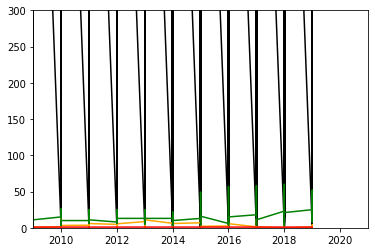

In [338]:
#plt.plot(spots['year'],spots['numperday'],color='black')
plt.plot(spots['year'],dailyspots,color='black')


#plt.plot(spots['year'],spots['idk1'],color='blue') #daily
plt.plot(spots['year'],spots['idk2'],color='orange') #monthly
plt.plot(spots['year'],spots['idk3'],color='green') #sc or cm predictions
plt.plot(spots['year'],spots['idk4'],color='red') #monthly smoothed
plt.xlim(2009,2021)
plt.ylim(0,300)

In [303]:
spots['year'][1:3]

1    1818
2    1818
Name: year, dtype: int64

In [307]:
spots['year'][2009]

1823

In [311]:
subset = [spots['year']>=2009] #& spots['year']<=2021
spots[subset]

[0        False
 1        False
 2        False
 3        False
 4        False
 5        False
 6        False
 7        False
 8        False
 9        False
 10       False
 11       False
 12       False
 13       False
 14       False
 15       False
 16       False
 17       False
 18       False
 19       False
 20       False
 21       False
 22       False
 23       False
 24       False
 25       False
 26       False
 27       False
 28       False
 29       False
          ...  
 73626     True
 73627     True
 73628     True
 73629     True
 73630     True
 73631     True
 73632     True
 73633     True
 73634     True
 73635     True
 73636     True
 73637     True
 73638     True
 73639     True
 73640     True
 73641     True
 73642     True
 73643     True
 73644     True
 73645     True
 73646     True
 73647     True
 73648     True
 73649     True
 73650     True
 73651     True
 73652     True
 73653     True
 73654     True
 73655     True
 Name: year, Length: 736

# coordinates need conversion betwn MAST & Hermes

In [339]:
dec_deg = mast_decs[2::] *u.degree
ra_deg = np.linspace(0,360,len(dec_deg)) *u.degree
#print(dec_rad)
print(len(dec_deg),len(ra_deg))

10013 10013


In [344]:
dec_deg = np.asarray(dec_deg)
ra_deg = np.asarray(ra_deg)

In [347]:
type(dec_deg)
dec_deg

array([Unit("-83.2399 deg"), Unit("-87.0717 deg"), Unit("-81.4584 deg"),
       ..., Unit("-79.8769 deg"), Unit("-80.8295 deg"),
       Unit("-78.7144 deg")], dtype=object)

In [346]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=ra_deg, dec=dec_deg, frame='icrs')


UnitTypeError: Longitude instances require units equivalent to 'rad', but no unit was given.

In [256]:
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

NameError: name 'c' is not defined

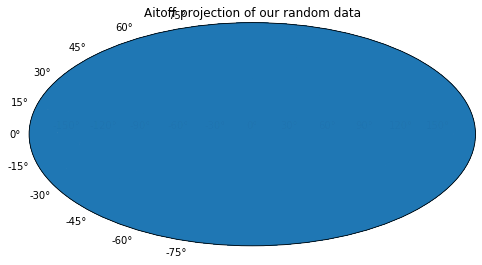

In [239]:
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()